In [1]:
from typing import List

In [2]:
import distinctipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import scipy
from sklearn import preprocessing
import seaborn as sns

## EDA

In [3]:
train_table = pd.read_csv("./train.csv")
train_table

id  allelectrons_Total  density_Total  allelectrons_Average  \
0          0               100.0       0.841611             10.000000   
1          1               100.0       7.558488             10.000000   
2          2                76.0       8.885992             15.600000   
3          3               100.0       8.795296             10.000000   
4          4               116.0       9.577996             11.600000   
...      ...                 ...            ...                   ...   
10402  10402               128.0       7.558488             12.000000   
10403  10403                30.0       1.743160             10.000000   
10404  10404               196.0      30.920000             24.500000   
10405  10405                38.0       1.553160             12.666667   
10406  10406               288.0      24.655328             11.142857   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
0           4.800000             20.612526          11.088100   
1           4.800000             20.298893          12.040830   
2           5.600000             33.739258          12.086300   
3           4.800000             20.213349          10.948500   
4           4.800000             24.988133          11.824480   
...              ...                   ...                ...   
10402       4.000000             26.385218          11.330440   
10403       5.333333             20.766935          14.163933   
10404       5.500000             53.490297          10.074300   
10405       4.666667             26.621687          11.290033   
10406       4.571429             22.536126          10.960357   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0                2.766000               1.732000               0.860000   
1                2.755000               1.631000               0.910000   
2                2.828000               1.788000               0.864000   
3                2.648000               1.626000               0.936000   
4                2.766000               1.682000               0.896000   
...                   ...                    ...                    ...   
10402            2.644000               1.631000               0.892000   
10403            3.090000               1.556667               0.866667   
10404            2.295000               1.545000               1.120000   
10405            2.743333               1.756667               0.980000   
10406            2.792143               1.772857               0.940000   

       zaratio_Average  density_Average  Hardness  
0             0.496070          0.91457       6.0  
1             0.492719          0.71760       6.5  
2             0.481478          1.50633       2.5  
3             0.489272          0.78937       6.0  
4             0.492736          1.86481       6.0  
...                ...              ...       ...  
10402         0.496070          1.79607       4.0  
10403         0.480390          0.81480       5.0  
10404         0.469715          2.11540       1.8  
10405         0.486507          0.77755       6.0  
10406         0.493919          0.97737       6.5  

[10407 rows x 13 columns]

In [4]:
columns_of_interest = ['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average']
target_column = ["Hardness"]

In [5]:
train_table.describe()

id  allelectrons_Total  density_Total  allelectrons_Average  \
count  10407.00000        10407.000000   10407.000000          10407.000000   
mean    5203.00000          128.053516      14.491342             17.033222   
std     3004.38646          224.123776      15.972877             10.468734   
min        0.00000            0.000000       0.000000              0.000000   
25%     2601.50000           68.000000       7.558488             10.000000   
50%     5203.00000          100.000000      10.650000             12.600000   
75%     7804.50000          131.000000      16.676996             22.000000   
max    10406.00000        15300.000000     643.093804             67.000000   

       val_e_Average  atomicweight_Average  ionenergy_Average  \
count   10407.000000          10407.000000       10407.000000   
mean        4.546789             37.507703          10.938308   
std         0.690864             26.012313           1.408276   
min         0.000000              0.000000           0.000000   
25%         4.000000             20.298893          10.590660   
50%         4.714286             26.203827          11.202760   
75%         4.800000             48.719500          11.670725   
max         6.000000            167.400000          15.245810   

       el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
count        10407.000000           10407.000000           10407.000000   
mean             2.607662               1.731330               0.944132   
std              0.334906               0.192481               0.180017   
min              0.000000               0.000000               0.000000   
25%              2.530000               1.672500               0.864000   
50%              2.706000               1.732727               0.915556   
75%              2.805000               1.800000               0.981667   
max              3.443000               2.250000               1.615840   

       zaratio_Average  density_Average      Hardness  
count     10407.000000     10407.000000  10407.000000  
mean          0.493349         2.132984      4.647126  
std           0.063080         1.936656      1.680525  
min           0.000000         0.000000      1.000000  
25%           0.476196         0.814800      3.000000  
50%           0.488550         1.351550      5.500000  
75%           0.496070         2.741550      6.000000  
max           0.825990        10.970000     10.000000

In [6]:
train_table[columns_of_interest].isnull().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [7]:
variables_corr = train_table[columns_of_interest].corr()
variables_corr

allelectrons_Total  density_Total  \
allelectrons_Total               1.000000       0.616092   
density_Total                    0.616092       1.000000   
allelectrons_Average             0.074725       0.356399   
val_e_Average                    0.071618       0.083640   
atomicweight_Average             0.078489       0.355614   
ionenergy_Average                0.034883      -0.104870   
el_neg_chi_Average               0.036897      -0.075535   
R_vdw_element_Average            0.038551       0.202331   
R_cov_element_Average            0.024420       0.240787   
zaratio_Average                  0.031035      -0.089792   
density_Average                  0.058067       0.336046   

                       allelectrons_Average  val_e_Average  \
allelectrons_Total                 0.074725       0.071618   
density_Total                      0.356399       0.083640   
allelectrons_Average               1.000000       0.004376   
val_e_Average                      0.004376       1.000000   
atomicweight_Average               0.990660       0.001860   
ionenergy_Average                 -0.360046       0.453901   
el_neg_chi_Average                -0.319413       0.550007   
R_vdw_element_Average              0.550669       0.354538   
R_cov_element_Average              0.688680       0.189352   
zaratio_Average                   -0.328973       0.093854   
density_Average                    0.803641      -0.068899   

                       atomicweight_Average  ionenergy_Average  \
allelectrons_Total                 0.078489           0.034883   
density_Total                      0.355614          -0.104870   
allelectrons_Average               0.990660          -0.360046   
val_e_Average                      0.001860           0.453901   
atomicweight_Average               1.000000          -0.356640   
ionenergy_Average                 -0.356640           1.000000   
el_neg_chi_Average                -0.316053           0.774050   
R_vdw_element_Average              0.529277           0.078650   
R_cov_element_Average              0.666165          -0.235344   
zaratio_Average                   -0.327459           0.638616   
density_Average                    0.796564          -0.359735   

                       el_neg_chi_Average  R_vdw_element_Average  \
allelectrons_Total               0.036897               0.038551   
density_Total                   -0.075535               0.202331   
allelectrons_Average            -0.319413               0.550669   
val_e_Average                    0.550007               0.354538   
atomicweight_Average            -0.316053               0.529277   
ionenergy_Average                0.774050               0.078650   
el_neg_chi_Average               1.000000               0.121926   
R_vdw_element_Average            0.121926               1.000000   
R_cov_element_Average           -0.174485               0.811823   
zaratio_Average                  0.441195               0.002984   
density_Average                 -0.322099               0.439990   

                       R_cov_element_Average  zaratio_Average  density_Average  
allelectrons_Total                  0.024420         0.031035         0.058067  
density_Total                       0.240787        -0.089792         0.336046  
allelectrons_Average                0.688680        -0.328973         0.803641  
val_e_Average                       0.189352         0.093854        -0.068899  
atomicweight_Average                0.666165        -0.327459         0.796564  
ionenergy_Average                  -0.235344         0.638616        -0.359735  
el_neg_chi_Average                 -0.174485         0.441195        -0.322099  
R_vdw_element_Average               0.811823         0.002984         0.439990  
R_cov_element_Average               1.000000        -0.221164         0.571741  
zaratio_Average                    -0.221164         1.000000        -0.306644  
density_Average                     0.571741        -0.3

### Heatmap function

In [8]:
def get_symmetric_heatmap_plot(
        X, 
        labels: List[str], 
        title: str = "Correlation between variables", 
        cbar_lable: str = "Correlation") -> plt:
    fig, ax = plt.subplots()
    im = ax.imshow(X)

    ax.set_xticks(np.arange(len(X)), labels=labels)
    ax.set_yticks(np.arange(len(X)), labels=labels)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    ax.set_title(title)
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbar_lable, rotation=-90, va="bottom")
    fig.tight_layout()
    plt.show()

### Heatmap plot showing correlation between variables

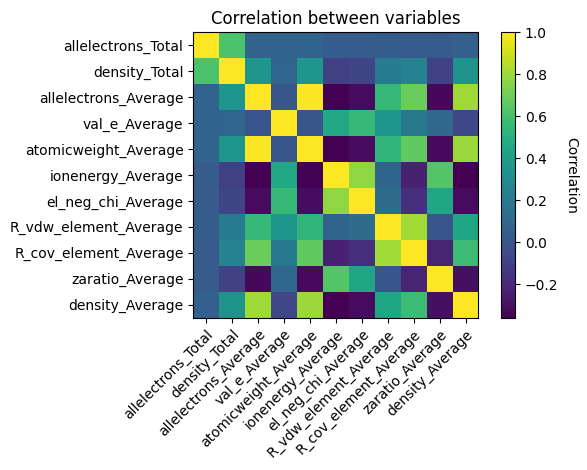

In [9]:
get_symmetric_heatmap_plot(variables_corr, columns_of_interest)

### Data clusterization

Let's try to group data together using instructions from [Kaggle](https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering#Hierarchical-Clustering):


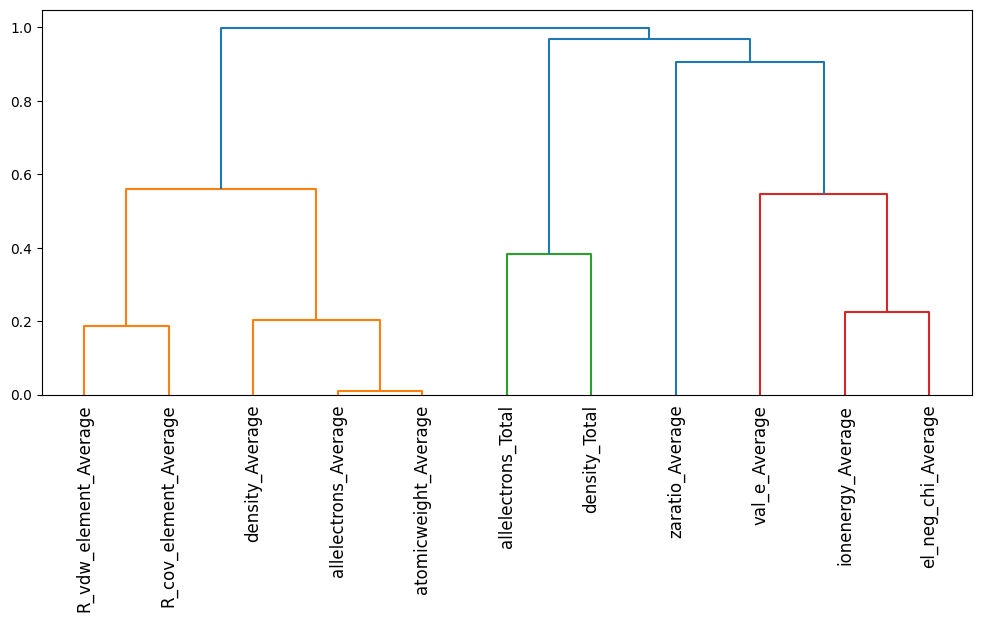

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(variables_corr)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=columns_of_interest, orientation='top', 
           leaf_rotation=90);

In [11]:
threshold = 0.6
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([2, 2, 1, 3, 1, 3, 3, 1, 1, 4, 1], dtype=int32)

In [12]:
columns_of_interest_clustered = [columns_of_interest[col] for col in np.argsort(labels)]
columns_of_interest_clustered

['allelectrons_Average',
 'atomicweight_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'density_Average',
 'allelectrons_Total',
 'density_Total',
 'val_e_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'zaratio_Average']

In [13]:
variables_corr_clustered = variables_corr.reindex(columns_of_interest_clustered).reindex(columns_of_interest_clustered, axis="columns")
variables_corr_clustered

allelectrons_Average  atomicweight_Average  \
allelectrons_Average               1.000000              0.990660   
atomicweight_Average               0.990660              1.000000   
R_vdw_element_Average              0.550669              0.529277   
R_cov_element_Average              0.688680              0.666165   
density_Average                    0.803641              0.796564   
allelectrons_Total                 0.074725              0.078489   
density_Total                      0.356399              0.355614   
val_e_Average                      0.004376              0.001860   
ionenergy_Average                 -0.360046             -0.356640   
el_neg_chi_Average                -0.319413             -0.316053   
zaratio_Average                   -0.328973             -0.327459   

                       R_vdw_element_Average  R_cov_element_Average  \
allelectrons_Average                0.550669               0.688680   
atomicweight_Average                0.529277               0.666165   
R_vdw_element_Average               1.000000               0.811823   
R_cov_element_Average               0.811823               1.000000   
density_Average                     0.439990               0.571741   
allelectrons_Total                  0.038551               0.024420   
density_Total                       0.202331               0.240787   
val_e_Average                       0.354538               0.189352   
ionenergy_Average                   0.078650              -0.235344   
el_neg_chi_Average                  0.121926              -0.174485   
zaratio_Average                     0.002984              -0.221164   

                       density_Average  allelectrons_Total  density_Total  \
allelectrons_Average          0.803641            0.074725       0.356399   
atomicweight_Average          0.796564            0.078489       0.355614   
R_vdw_element_Average         0.439990            0.038551       0.202331   
R_cov_element_Average         0.571741            0.024420       0.240787   
density_Average               1.000000            0.058067       0.336046   
allelectrons_Total            0.058067            1.000000       0.616092   
density_Total                 0.336046            0.616092       1.000000   
val_e_Average                -0.068899            0.071618       0.083640   
ionenergy_Average            -0.359735            0.034883      -0.104870   
el_neg_chi_Average           -0.322099            0.036897      -0.075535   
zaratio_Average              -0.306644            0.031035      -0.089792   

                       val_e_Average  ionenergy_Average  el_neg_chi_Average  \
allelectrons_Average        0.004376          -0.360046           -0.319413   
atomicweight_Average        0.001860          -0.356640           -0.316053   
R_vdw_element_Average       0.354538           0.078650            0.121926   
R_cov_element_Average       0.189352          -0.235344           -0.174485   
density_Average            -0.068899          -0.359735           -0.322099   
allelectrons_Total          0.071618           0.034883            0.036897   
density_Total               0.083640          -0.104870           -0.075535   
val_e_Average               1.000000           0.453901            0.550007   
ionenergy_Average           0.453901           1.000000            0.774050   
el_neg_chi_Average          0.550007           0.774050            1.000000   
zaratio_Average             0.093854           0.638616            0.441195   

                       zaratio_Average  
allelectrons_Average         -0.328973  
atomicweight_Average         -0.327459  
R_vdw_element_Average         0.002984  
R_cov_element_Average        -0.221164  
density_Average              -0.306644  
allelectrons_Total            0.031035  
density_Total                -0.089792  
val_e_Average                 0.093854  
ionenergy_Average             0.638616  
el_neg_chi_Average            0.441195  
zaratio_Average 

### Heatmap of clustered data

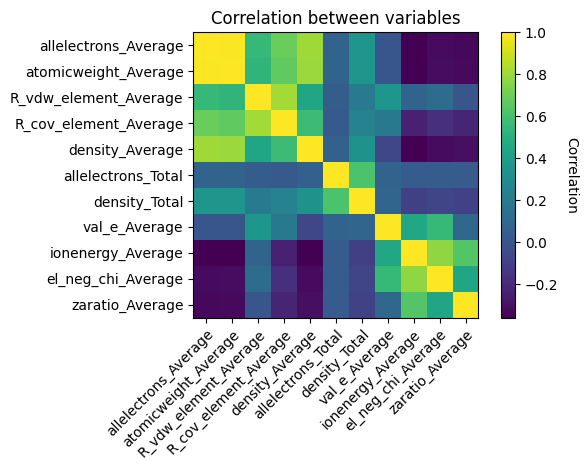

In [14]:
get_symmetric_heatmap_plot(variables_corr_clustered, columns_of_interest_clustered)

As we can see now, we can roughly define three clusters:
1) allelectrons_Average, atomicweight_Average, R_vdw_element_Average, R_cov_element_Average, density_Average
2) allelectrons_total, density_total
3) val_e_Average, ionenergy_Average, el_neg_chi_Average, zaratio_Average

In [15]:
variables_corr_clustered_with_target = train_table[columns_of_interest_clustered+target_column].corr()
variables_corr_clustered_with_target

allelectrons_Average  atomicweight_Average  \
allelectrons_Average               1.000000              0.990660   
atomicweight_Average               0.990660              1.000000   
R_vdw_element_Average              0.550669              0.529277   
R_cov_element_Average              0.688680              0.666165   
density_Average                    0.803641              0.796564   
allelectrons_Total                 0.074725              0.078489   
density_Total                      0.356399              0.355614   
val_e_Average                      0.004376              0.001860   
ionenergy_Average                 -0.360046             -0.356640   
el_neg_chi_Average                -0.319413             -0.316053   
zaratio_Average                   -0.328973             -0.327459   
Hardness                          -0.400496             -0.402948   

                       R_vdw_element_Average  R_cov_element_Average  \
allelectrons_Average                0.550669               0.688680   
atomicweight_Average                0.529277               0.666165   
R_vdw_element_Average               1.000000               0.811823   
R_cov_element_Average               0.811823               1.000000   
density_Average                     0.439990               0.571741   
allelectrons_Total                  0.038551               0.024420   
density_Total                       0.202331               0.240787   
val_e_Average                       0.354538               0.189352   
ionenergy_Average                   0.078650              -0.235344   
el_neg_chi_Average                  0.121926              -0.174485   
zaratio_Average                     0.002984              -0.221164   
Hardness                           -0.061402              -0.189111   

                       density_Average  allelectrons_Total  density_Total  \
allelectrons_Average          0.803641            0.074725       0.356399   
atomicweight_Average          0.796564            0.078489       0.355614   
R_vdw_element_Average         0.439990            0.038551       0.202331   
R_cov_element_Average         0.571741            0.024420       0.240787   
density_Average               1.000000            0.058067       0.336046   
allelectrons_Total            0.058067            1.000000       0.616092   
density_Total                 0.336046            0.616092       1.000000   
val_e_Average                -0.068899            0.071618       0.083640   
ionenergy_Average            -0.359735            0.034883      -0.104870   
el_neg_chi_Average           -0.322099            0.036897      -0.075535   
zaratio_Average              -0.306644            0.031035      -0.089792   
Hardness                     -0.360780           -0.061687      -0.161524   

                       val_e_Average  ionenergy_Average  el_neg_chi_Average  \
allelectrons_Average        0.004376          -0.360046           -0.319413   
atomicweight_Average        0.001860          -0.356640           -0.316053   
R_vdw_element_Average       0.354538           0.078650            0.121926   
R_cov_element_Average       0.189352          -0.235344           -0.174485   
density_Average            -0.068899          -0.359735           -0.322099   
allelectrons_Total          0.071618           0.034883            0.036897   
density_Total               0.083640          -0.104870           -0.075535   
val_e_Average               1.000000           0.453901            0.550007   
ionenergy_Average           0.453901           1.000000            0.774050   
el_neg_chi_Average          0.550007           0.774050            1.000000   
zaratio_Average             0.093854           0.638616            0.441195   
Hardness                    0.161715           0.203203            0.290352   

                       zaratio_Average  Hardness  
allelectrons_Average         -0.328973 -0.400496  
atomicweight_Average         -0.327459 -0.402948  
R_vdw_element_Aver

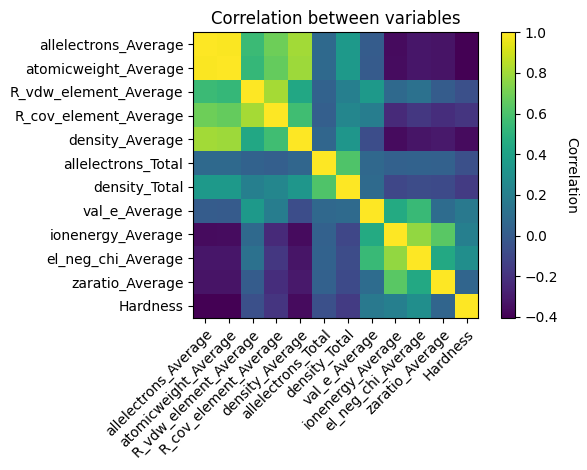

In [16]:
get_symmetric_heatmap_plot(variables_corr_clustered_with_target, columns_of_interest_clustered+target_column)

It seems like Hardness is negatively correlated with variables from first cluster (except for R_vdw_element_Average and R_cov_element_Average)

### scale data and transform to make BoxPlots

In [17]:
variables_clustered_df = train_table[columns_of_interest_clustered]

In [18]:
variables_clustered_with_target_df = pd.concat([variables_clustered_df, train_table[target_column]], axis=1)
variables_clustered_with_target_df

allelectrons_Average  atomicweight_Average  R_vdw_element_Average  \
0                 10.000000             20.612526               1.732000   
1                 10.000000             20.298893               1.631000   
2                 15.600000             33.739258               1.788000   
3                 10.000000             20.213349               1.626000   
4                 11.600000             24.988133               1.682000   
...                     ...                   ...                    ...   
10402             12.000000             26.385218               1.631000   
10403             10.000000             20.766935               1.556667   
10404             24.500000             53.490297               1.545000   
10405             12.666667             26.621687               1.756667   
10406             11.142857             22.536126               1.772857   

       R_cov_element_Average  density_Average  allelectrons_Total  \
0                   0.860000          0.91457               100.0   
1                   0.910000          0.71760               100.0   
2                   0.864000          1.50633                76.0   
3                   0.936000          0.78937               100.0   
4                   0.896000          1.86481               116.0   
...                      ...              ...                 ...   
10402               0.892000          1.79607               128.0   
10403               0.866667          0.81480                30.0   
10404               1.120000          2.11540               196.0   
10405               0.980000          0.77755                38.0   
10406               0.940000          0.97737               288.0   

       density_Total  val_e_Average  ionenergy_Average  el_neg_chi_Average  \
0           0.841611       4.800000          11.088100            2.766000   
1           7.558488       4.800000          12.040830            2.755000   
2           8.885992       5.600000          12.086300            2.828000   
3           8.795296       4.800000          10.948500            2.648000   
4           9.577996       4.800000          11.824480            2.766000   
...              ...            ...                ...                 ...   
10402       7.558488       4.000000          11.330440            2.644000   
10403       1.743160       5.333333          14.163933            3.090000   
10404      30.920000       5.500000          10.074300            2.295000   
10405       1.553160       4.666667          11.290033            2.743333   
10406      24.655328       4.571429          10.960357            2.792143   

       zaratio_Average  Hardness  
0             0.496070       6.0  
1             0.492719       6.5  
2             0.481478       2.5  
3             0.489272       6.0  
4             0.492736       6.0  
...                ...       ...  
10402         0.496070       4.0  
10403         0.480390       5.0  
10404         0.469715       1.8  
10405         0.486507       6.0  
10406         0.493919       6.5  

[10407 rows x 12 columns]

In [19]:
stdScaler = preprocessing.StandardScaler().fit(variables_clustered_df.to_numpy())
variables_clustered_std = stdScaler.transform(variables_clustered_df.to_numpy())
variables_clustered_std_df = pd.DataFrame(variables_clustered_std, columns=columns_of_interest_clustered)

In [20]:
variables_clustered_std_with_target_df = pd.concat([variables_clustered_std_df, train_table[target_column]], axis=1)
variables_clustered_std_with_target_df

allelectrons_Average  atomicweight_Average  R_vdw_element_Average  \
0                 -0.671863             -0.649538               0.003480   
1                 -0.671863             -0.661596              -0.521272   
2                 -0.136912             -0.144879               0.294432   
3                 -0.671863             -0.664885              -0.547250   
4                 -0.519020             -0.481317              -0.256298   
...                     ...                   ...                    ...   
10402             -0.480809             -0.427606              -0.521272   
10403             -0.671863             -0.643602              -0.907476   
10404              0.713280              0.614454              -0.968091   
10405             -0.417124             -0.418515               0.131637   
10406             -0.562690             -0.575585               0.215756   

       R_cov_element_Average  density_Average  allelectrons_Total  \
0                  -0.467381        -0.629163           -0.125176   
1                  -0.189615        -0.730874           -0.125176   
2                  -0.445159        -0.323591           -0.232265   
3                  -0.045177        -0.693814           -0.125176   
4                  -0.267389        -0.138479           -0.053783   
...                      ...              ...                 ...   
10402              -0.289611        -0.173975           -0.000239   
10403              -0.430345        -0.680682           -0.437518   
10404               0.977000        -0.009080            0.303180   
10405               0.199257        -0.699917           -0.401822   
10406              -0.022956        -0.596734            0.713687   

       density_Total  val_e_Average  ionenergy_Average  el_neg_chi_Average  \
0          -0.854598       0.366532           0.106370            0.472806   
1          -0.434060       0.366532           0.782925            0.439960   
2          -0.350946       1.524558           0.815215            0.657942   
3          -0.356625       0.366532           0.007237            0.120452   
4          -0.307620       0.366532           0.629290            0.472806   
...              ...            ...                ...                 ...   
10402      -0.434060      -0.791495           0.278461            0.108507   
10403      -0.798153       1.138549           2.290588            1.440289   
10404       1.028584       1.379805          -0.613552           -0.933627   
10405      -0.810048       0.173527           0.249768            0.405122   
10406       0.636358       0.035667           0.015657            0.550870   

       zaratio_Average  Hardness  
0             0.043139       6.0  
1            -0.009986       6.5  
2            -0.188197       2.5  
3            -0.064634       6.0  
4            -0.009717       6.0  
...                ...       ...  
10402         0.043139       4.0  
10403        -0.205446       5.0  
10404        -0.374683       1.8  
10405        -0.108474       6.0  
10406         0.009031       6.5  

[10407 rows x 12 columns]

In [21]:
from itertools import combinations
from math import ceil, floor
def scatter_plot(X1, X2, labels, ax, color):
    ax.scatter(X1, X2, color=color)  
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])

def scatter_plot_of_pairwise_combinations(X, column_list_of_combination):
    """
    Draw simple scatter plot
    

    """
    number_of_columns = len(column_list_of_combination)
    if number_of_columns == 2:
        fig, ax = plt.subplots(figsize=(5,5))
        color = distinctipy.get_colors(1, rng=1)[0]
        scatter_plot(
            X[column_list_of_combination[0]], 
            X[column_list_of_combination[1]], 
            column_list_of_combination, 
            ax, 
            color)
        return
    nrows = ceil((number_of_columns-1)/(2**0.5))
    ncols = ceil(number_of_columns/(2**0.5))
    colors = distinctipy.get_colors(number_of_columns, rng=1)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
    
    for iti, cols in enumerate(combinations(column_list_of_combination, r=2)):
        i, j = divmod(iti, ncols)
        ax = axs[i, j]
        color = colors[column_list_of_combination.index(cols[0])]
        X1 = X[[cols[0]]]
        X2 = X[[cols[1]]]
        scatter_plot(X1, X2, [cols[0], cols[1]], ax, color)
    

In [22]:
variables_cluster_df1 = variables_clustered_std_df[["allelectrons_Average", "atomicweight_Average", "R_vdw_element_Average", "R_cov_element_Average", "density_Average"]]
variables_cluster_df2 = variables_clustered_std_df[["allelectrons_Total", "density_Total"]]
variables_cluster_df3 = variables_clustered_std_df[["val_e_Average", "ionenergy_Average", "el_neg_chi_Average", "zaratio_Average"]]

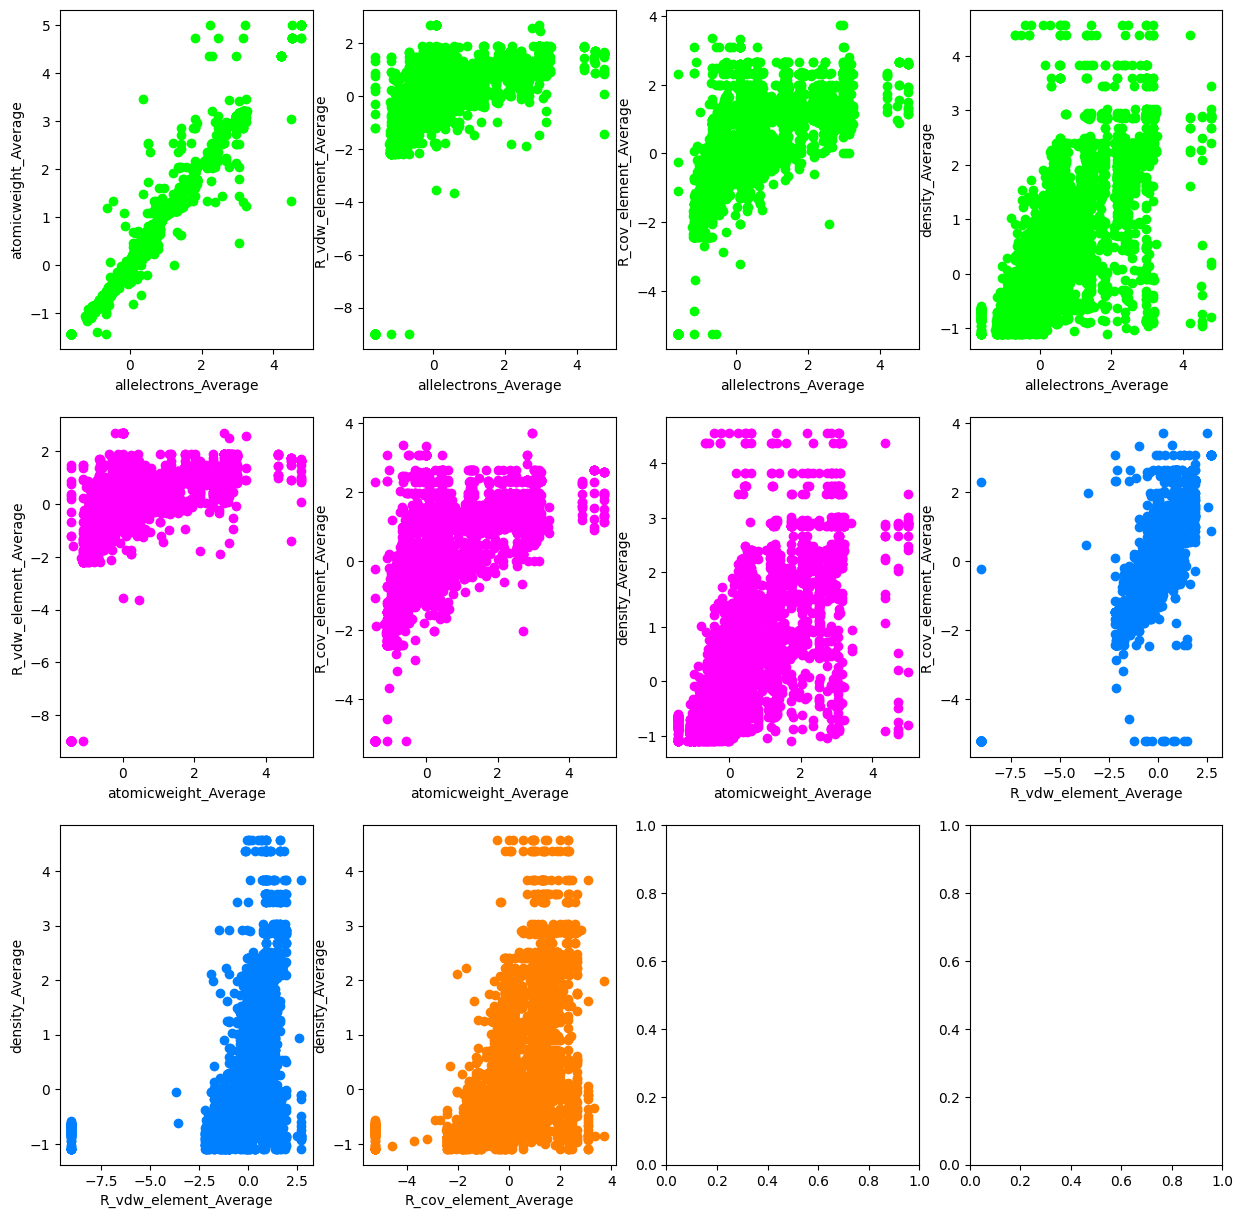

In [23]:
scatter_plot_of_pairwise_combinations(variables_cluster_df1, variables_cluster_df1.columns.to_list())

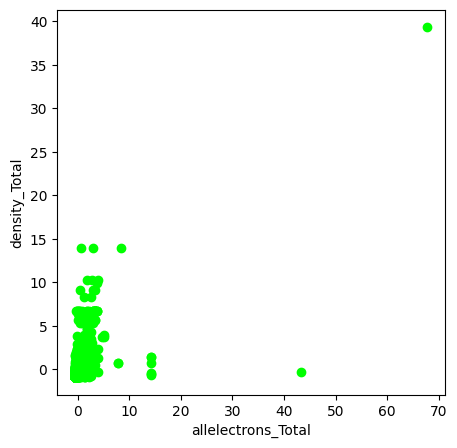

In [24]:
scatter_plot_of_pairwise_combinations(variables_cluster_df2, variables_cluster_df2.columns.to_list())

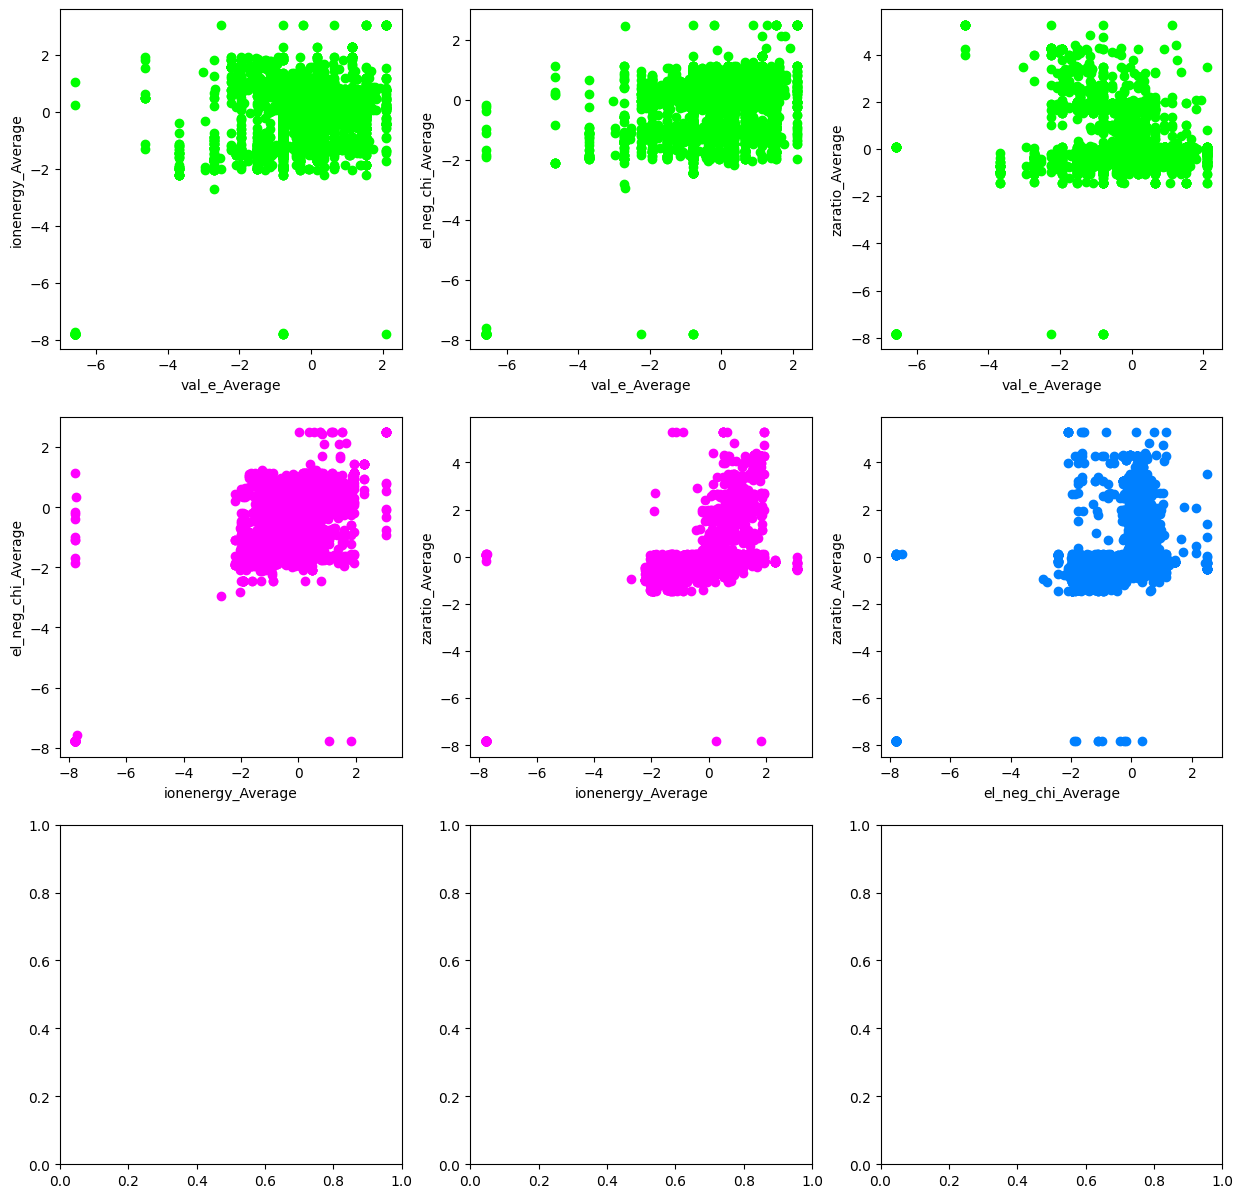

In [25]:
scatter_plot_of_pairwise_combinations(variables_cluster_df3, variables_cluster_df3.columns.to_list())

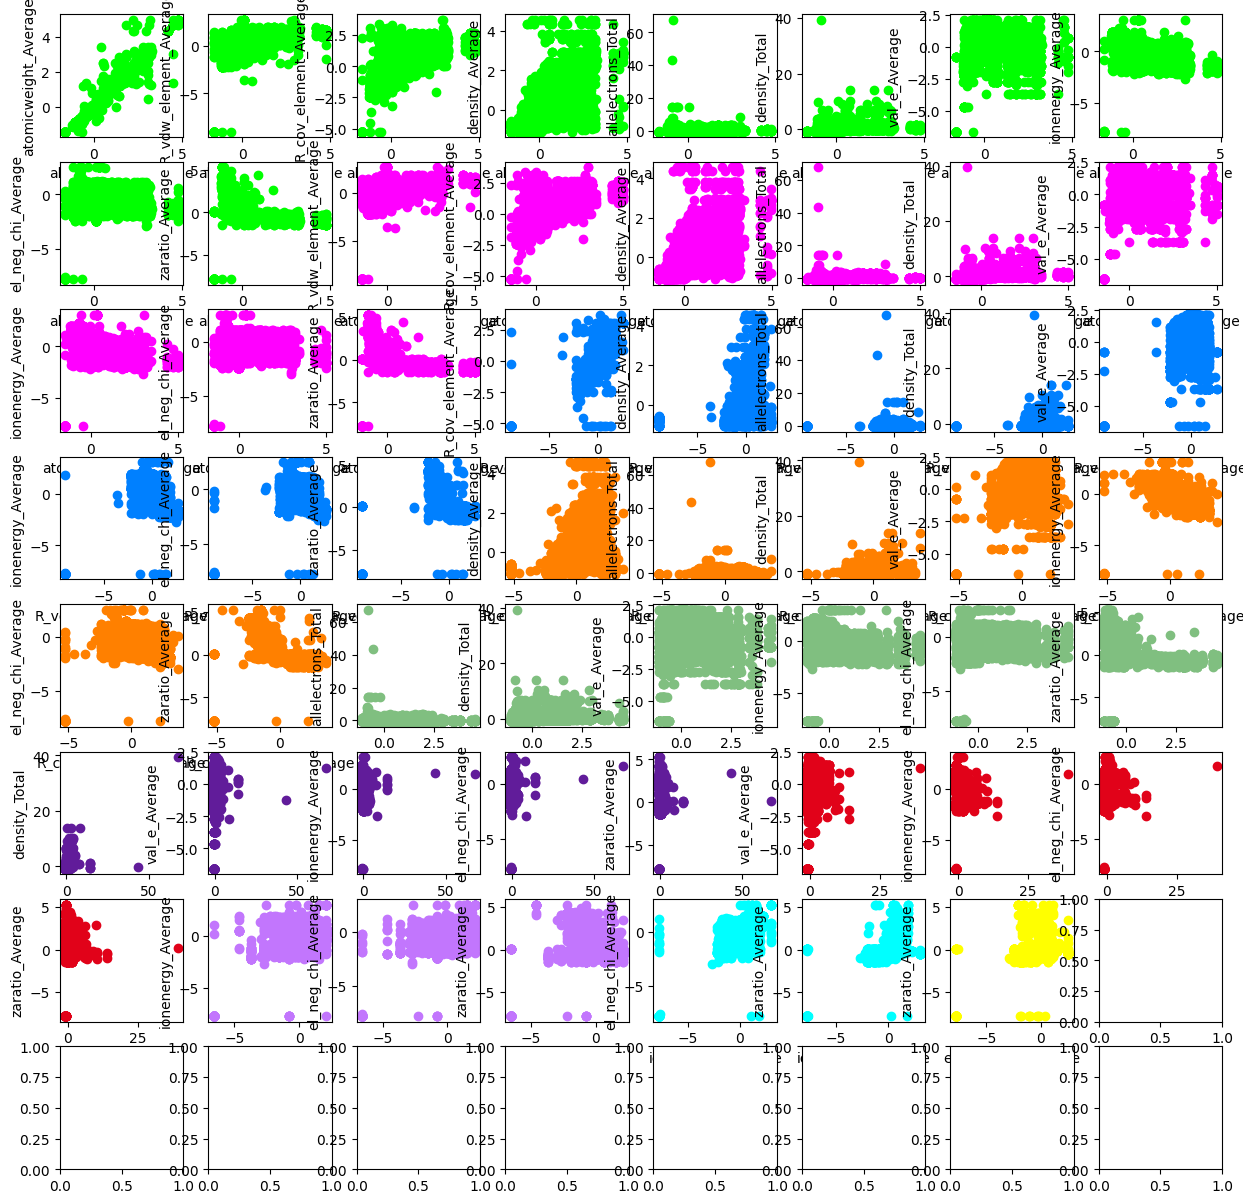

In [26]:
scatter_plot_of_pairwise_combinations(variables_clustered_std_df, variables_clustered_std_df.columns.to_list())

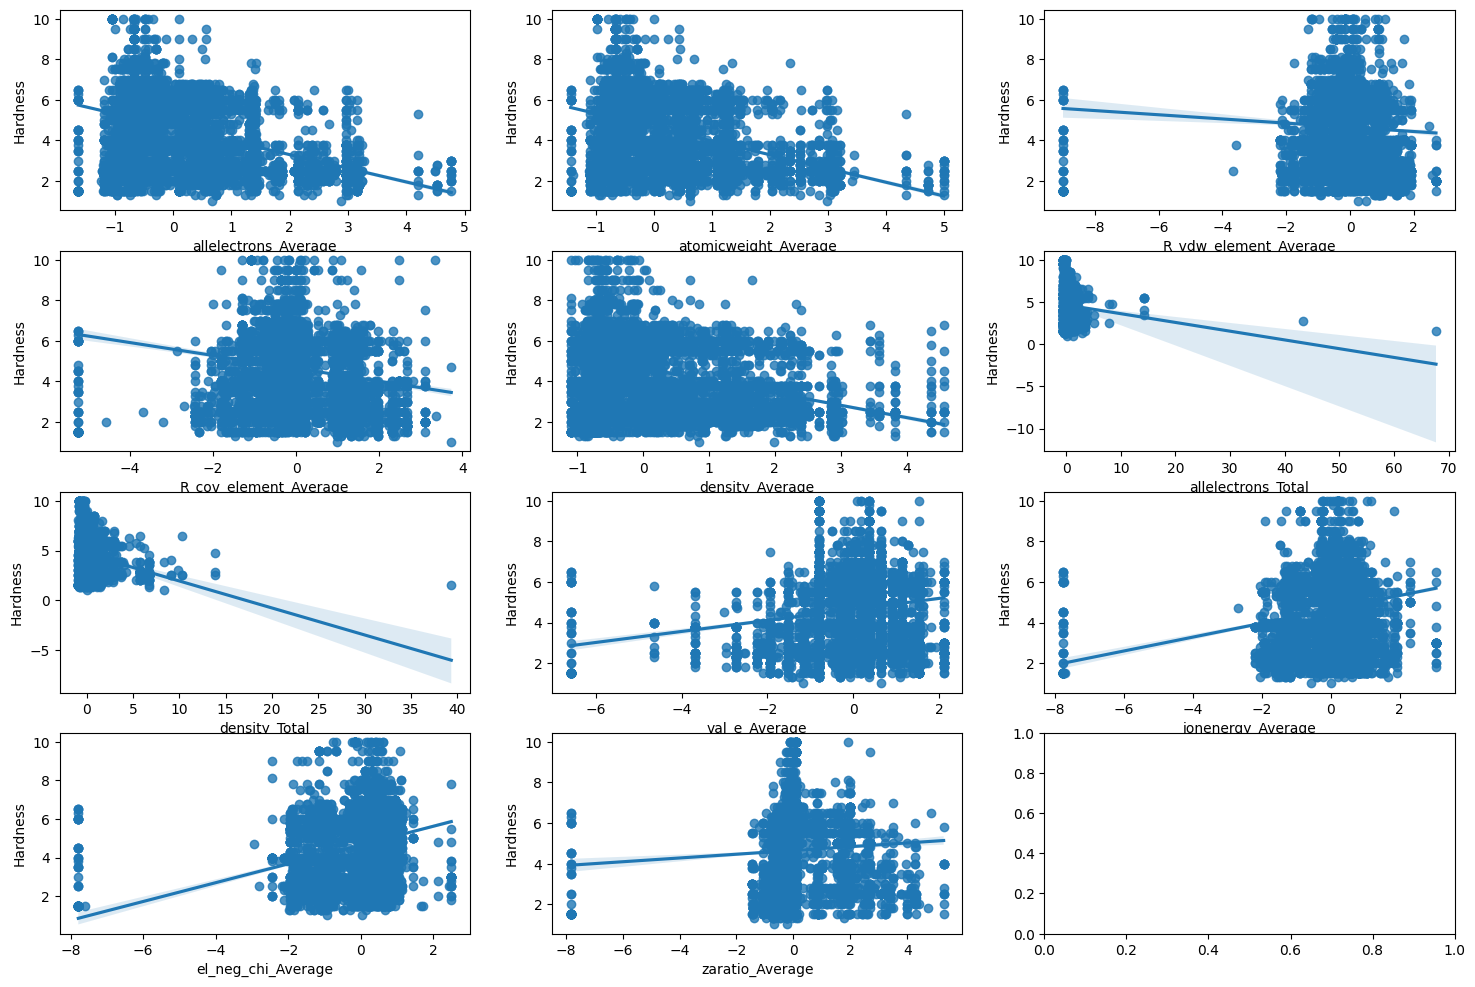

In [27]:
columns_clustered_target = columns_of_interest_clustered+target_column
target = target_column[0]
fig, ax = plt.subplots(round(len(columns_clustered_target) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    col = columns_clustered_target[i]
    if i < len(columns_clustered_target) - 1:
        sns.regplot(x=col,y=target, data=variables_clustered_std_with_target_df[[col, target]], ax=ax)

In [28]:
def distribution_plot(df, color='g', ax=None, fig=None):
    if ax is None:
        fig, ax = plt.subplots(figsize = (4,4))
    sns.histplot(df, kde=True, stat="density", kde_kws=dict(cut=3), color=color, bins=100, alpha=0.4, edgecolor=(1, 1, 1, .4), ax=ax)
    return fig, ax

def distribution_plots(df, columns, title="", df2:pd.DataFrame=None, df2_label:str=None):
    fig, ax = plt.subplots(round(len(columns) / 3), 3, figsize = (18, 12))
    # get_legend/add_legend
    for i, ax in enumerate(fig.axes):
        col = columns[i]
        labels = []
        sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3), color='g', bins=100, alpha=0.4, edgecolor=(1, 1, 1, .4), ax=ax)
        labels.append(f"Distribution by {col}")
        legend = ax.legend(labels=labels, title="Density distribution")
        ax.add_artist(legend)
    if title:
        fig.suptitle(title)

### Calculate distribution of variables

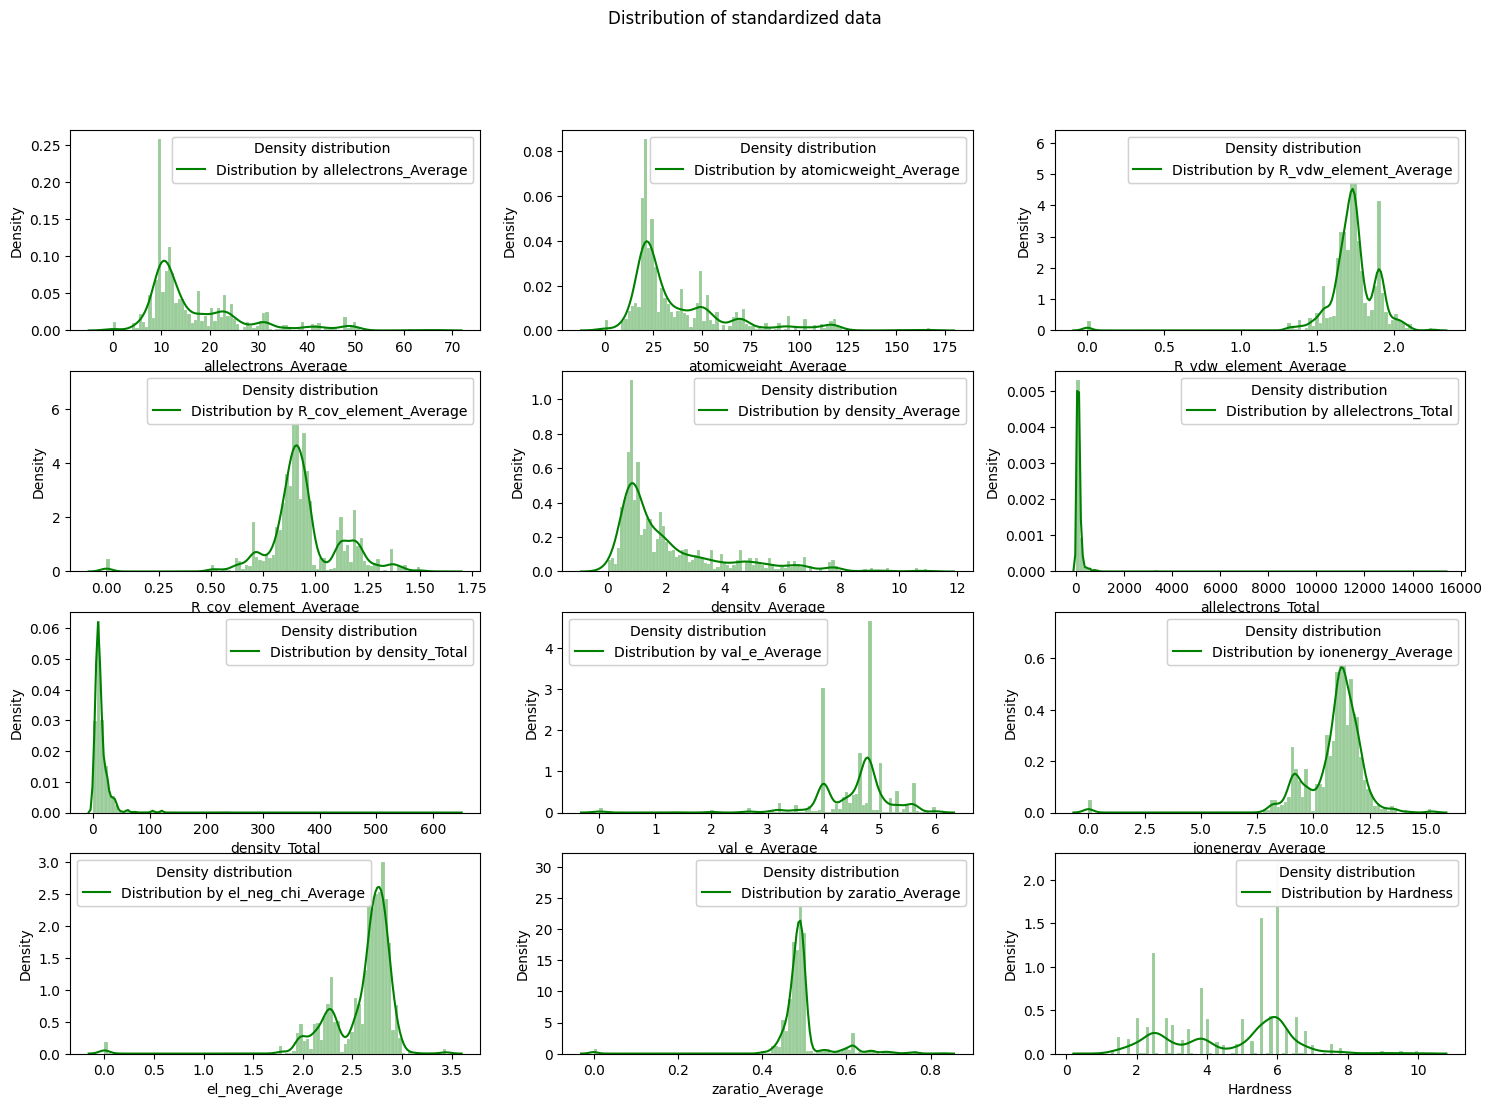

In [29]:
columns_clustered_target = columns_of_interest_clustered+target_column
distribution_plots(variables_clustered_with_target_df, columns_clustered_target, title="Distribution of standardized data")

Taking into account the distribution of Hardness, our task might be one of the classification rather than regression: 

In [30]:
hardness_values = sorted(train_table[target_column[0]].unique())
len(hardness_values), np.array(hardness_values)

(50,
 array([ 1.  ,  1.3 ,  1.5 ,  1.8 ,  2.  ,  2.1 ,  2.2 ,  2.3 ,  2.5 ,
         2.6 ,  2.8 ,  2.9 ,  3.  ,  3.2 ,  3.3 ,  3.5 ,  3.6 ,  3.8 ,
         4.  ,  4.1 ,  4.3 ,  4.5 ,  4.7 ,  4.8 ,  5.  ,  5.3 ,  5.4 ,
         5.5 ,  5.75,  5.8 ,  6.  ,  6.2 ,  6.3 ,  6.4 ,  6.5 ,  6.64,
         6.7 ,  6.8 ,  7.  ,  7.3 ,  7.5 ,  7.8 ,  8.  ,  8.1 ,  8.3 ,
         8.5 ,  9.  ,  9.5 ,  9.8 , 10.  ]))

In [31]:
mineral_dataset_check = pd.read_csv("./Mineral_Dataset_Supplementary_Info.csv")
mineral_dataset_check

Unnamed: 0  Hardness  allelectrons_Total  density_Total  \
0             0       2.3               110.0      23.000000   
1             1       5.5               406.0      30.472136   
2             2       5.5               406.0      30.472464   
3             3       5.5               476.0      61.142136   
4             4       5.5               476.0      61.142464   
..          ...       ...                 ...            ...   
617         625       3.8                46.0       9.133000   
618         626       4.5                86.0       6.674328   
619         628       4.0                38.0       7.134332   
620         629       7.5                86.0       8.841328   
621         630       6.0               226.0      18.204400   

     allelectrons_Average  val_e_Average  atomicweight_Average  \
0               36.666667       2.666667             82.598467   
1                9.902439       4.682927             19.813180   
2               10.410256       4.923077             20.931371   
3               11.609756       4.682927             23.659644   
4               12.205128       4.923077             24.975089   
..                    ...            ...                   ...   
617             23.000000       4.000000             48.719500   
618             14.333333       5.166667             30.645954   
619             19.000000       4.000000             40.689515   
620             14.333333       5.000000             30.550687   
621             10.272727       4.727273             20.652175   

     ionenergy_Average  el_neg_chi_Average  R_vdw_element_Average  \
0             8.504133            2.146667               2.006667   
1            11.456151            2.700244               1.676829   
2            11.541405            2.753590               1.703846   
3            11.487395            2.763659               1.714634   
4            11.574251            2.820256               1.743590   
..                 ...                 ...                    ...   
617           9.877100            2.115000               1.905000   
618          11.862733            2.861667               1.700000   
619          11.506150            2.545000               1.765000   
620          11.543000            2.831667               1.735000   
621          11.148755            2.702273               1.695455   

     R_cov_element_Average  zaratio_Average  density_Average  
0                 1.253333         0.456803         7.666667  
1                 0.868293         0.522909         0.743223  
2                 0.894359         0.497498         0.781345  
3                 0.848780         0.519474         1.491272  
4                 0.873846         0.493887         1.567755  
..                     ...              ...              ...  
617               1.120000         0.478880         4.566500  
618               0.901667         0.487172         1.112388  
619               0.920000         0.479405         3.567166  
620               0.890000         0.489507         1.473555  
621               0.875455         0.519605         0.827473  

[622 rows x 13 columns]

In [32]:
hardness_values_total = sorted(mineral_dataset_check[target_column[0]].unique())
len(hardness_values_total), np.array(hardness_values_total)

(37,
 array([ 1. ,  1.3,  1.5,  1.8,  2. ,  2.3,  2.5,  2.8,  2.9,  3. ,  3.2,
         3.3,  3.5,  3.6,  3.8,  4. ,  4.3,  4.5,  4.8,  5. ,  5.3,  5.5,
         5.8,  6. ,  6.2,  6.3,  6.5,  6.8,  7. ,  7.3,  7.5,  7.8,  8. ,
         8.5,  9. ,  9.5, 10. ]))

In [33]:
new_hardness_values = [i for i in hardness_values if i not in hardness_values_total]
new_hardness_values
val_sum = 0
total_num = train_table.shape[0]
print("Calculating number of interesting hardness values")
for val in new_hardness_values:
    val_table = train_table[train_table[target_column[0]]==val]
    val_sum += val_table.shape[0]
    print(val, val_table.shape[0], val_sum, total_num)

Calculating number of interesting hardness values
2.1 1 1 10407
2.2 1 2 10407
2.6 1 3 10407
4.1 1 4 10407
4.7 1 5 10407
5.4 1 6 10407
5.75 10 16 10407
6.4 1 17 10407
6.64 1 18 10407
6.7 1 19 10407
8.1 7 26 10407
8.3 1 27 10407
9.8 1 28 10407


In [34]:
outlier_hardness_values = new_hardness_values

Out of 10407 Hardness values, only 28 of them have new, not consistent with ./Mineral_Dataset_Supplementary_Info values. 

To delete?

In [35]:
def calculate_quantiles_and_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return (Q1, Q3, IQR)

Q1, Q3, IQR = calculate_quantiles_and_IQR(variables_clustered_std_df)

def get_outliers_from_df_by_col(df, col):
    Q1, Q3, IQR = calculate_quantiles_and_IQR(df[col])
    return df[((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    
def remove_outliers(df):
    Q1, Q3, IQR = calculate_quantiles_and_IQR(df)
    if type(df) == pd.DataFrame:
        return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]
print(IQR)

allelectrons_Average     1.146325
atomicweight_Average     1.092635
R_vdw_element_Average    0.662435
R_cov_element_Average    0.653675
density_Average          0.994933
allelectrons_Total       0.281108
density_Total            0.570902
val_e_Average            1.158027
ionenergy_Average        0.766978
el_neg_chi_Average       0.821166
zaratio_Average          0.315075
dtype: float64


Out 

Are outliers from test data differ from outliers from train data?

Ideally, we shouldn't be able to know this information. But as it was given..

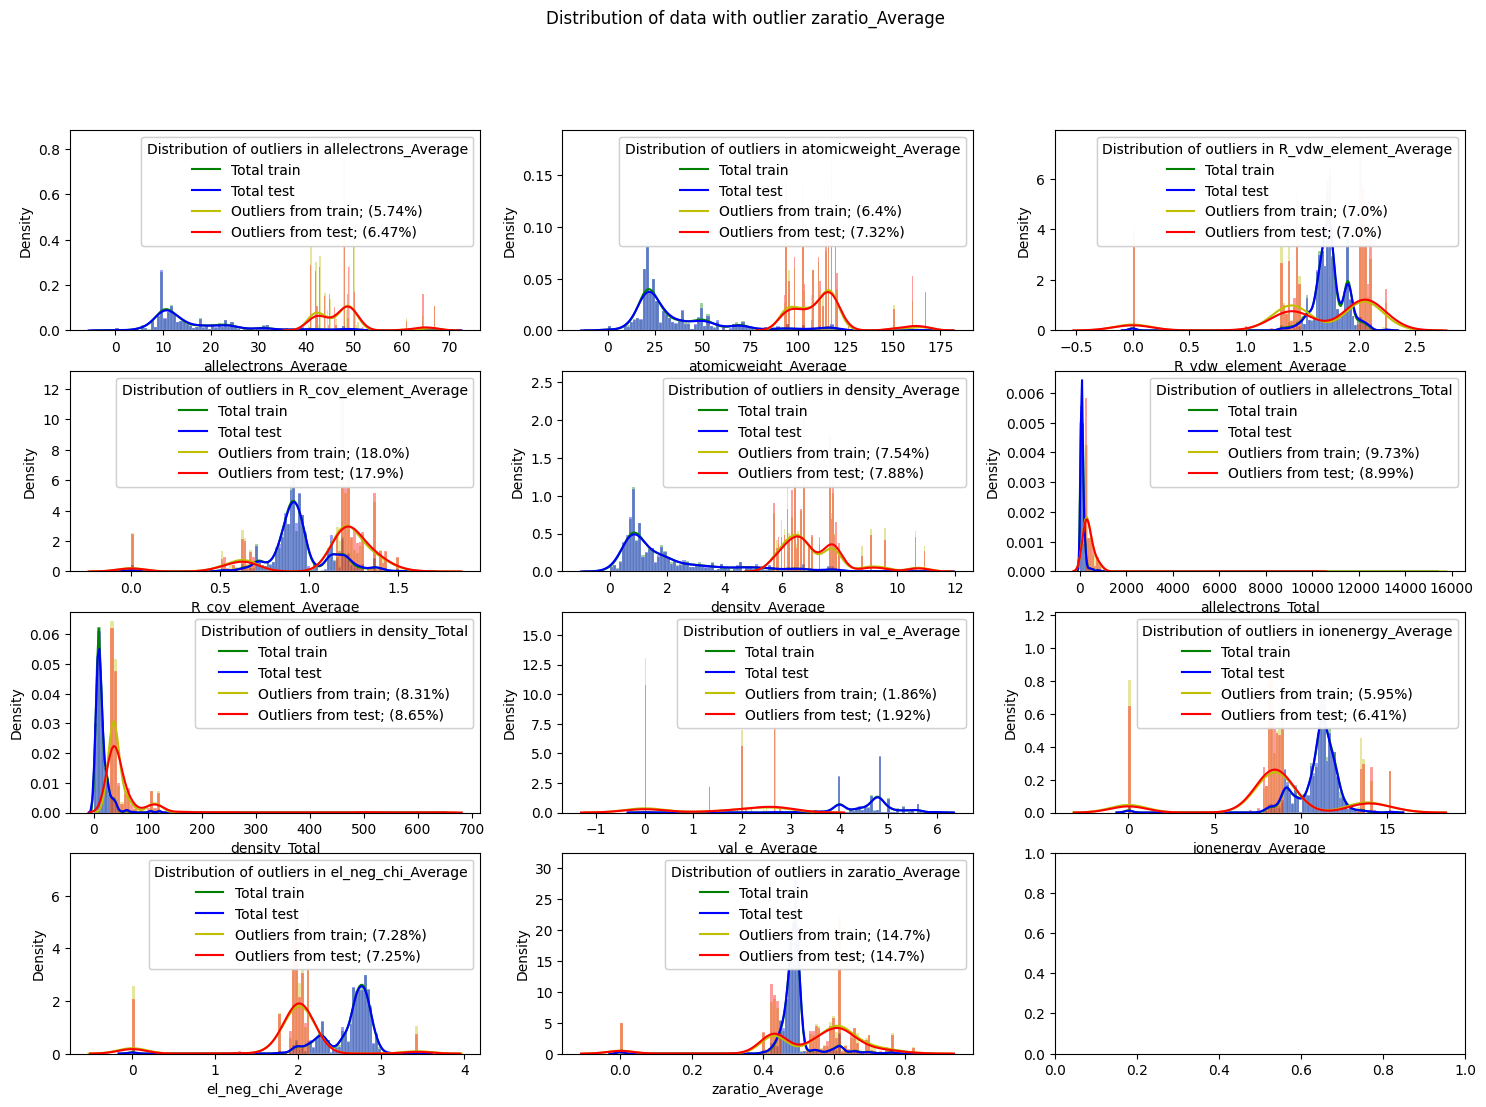

In [36]:
check_test_table = pd.read_csv("./test.csv")

df = variables_clustered_df.copy()
test_df = check_test_table[columns_of_interest_clustered].copy()
fig, ax = plt.subplots(round(len(columns_of_interest_clustered) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i == len(columns_of_interest_clustered):
        break
    col = columns_of_interest_clustered[i]
    Q1, Q3, IQR = calculate_quantiles_and_IQR(df[col])
    outlier_df = df[((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]
    _train_percentage = outlier_df.shape[0] / df.shape[0]

    test_outlier_df = test_df[((test_df[col] < (Q1 - 1.5 * IQR)) |(test_df[col] > (Q3 + 1.5 * IQR)))]
    _test_percentage = test_outlier_df.shape[0] / test_df.shape[0]
    fig, ax = distribution_plot(df[col], color='g', ax=ax, fig=fig)
    fig, ax = distribution_plot(test_df[col], color='b', ax=ax, fig=fig)

    fig, ax = distribution_plot(outlier_df[col], color='y', ax=ax, fig=fig)
    fig, ax = distribution_plot(test_outlier_df[col], color='r', ax=ax, fig=fig)
    labels = ["Total train", "Total test", f"Outliers from train; ({_train_percentage*100:.3}%)", f"Outliers from test; ({_test_percentage*100:.3}%)"]
    legend = ax.legend(labels=labels, title=f"Distribution of outliers in {col}")
    ax.add_artist(legend)
    fig.suptitle(f"Distribution of data with outlier {col}")

Outliers are distributed almost in the same way.

It seems like all outliers except for `R_cov_element_Average` and `zaratio_Average` do not exceed 10%.
Let's check how many outliers do we have in total (with and without taking into account these two variables):

In [37]:
columns_no_R_cov = columns_of_interest_clustered.copy()
columns_no_R_cov.pop(columns_no_R_cov.index('R_cov_element_Average'))

columns_no_zaratio = columns_of_interest_clustered.copy()
columns_no_zaratio.pop(columns_no_R_cov.index('zaratio_Average'))

columns_no_R_cov_zaratio = columns_no_R_cov.copy()
columns_no_R_cov_zaratio.pop(columns_no_R_cov.index('zaratio_Average'))

df = variables_clustered_df.copy()
no_R_cov_df = df[columns_no_R_cov]
no_zaratio_df = df[columns_no_zaratio]
no_R_cov_zaratio_df = df[columns_no_R_cov_zaratio]

Q1, Q3, IQR = calculate_quantiles_and_IQR(df)
df_outliers = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_R_cov_df)
no_R_cov_df_outliers = no_R_cov_df[((no_R_cov_df < (Q1 - 1.5 * IQR)) |(no_R_cov_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_zaratio_df)
no_zaratio_df_outliers = no_zaratio_df[((no_zaratio_df < (Q1 - 1.5 * IQR)) |(no_zaratio_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_R_cov_zaratio_df)
no_R_cov_zaratio_df_outliers = no_R_cov_zaratio_df[((no_R_cov_zaratio_df < (Q1 - 1.5 * IQR)) |(no_R_cov_zaratio_df > (Q3 + 1.5 * IQR))).any(axis=1)]

total_percentage_of_outliers = df_outliers.shape[0]/df.shape[0]
no_R_cov_percentage_of_outliers = no_R_cov_df_outliers.shape[0]/df.shape[0]
no_zaratio_percentage_of_outliers = no_zaratio_df_outliers.shape[0]/df.shape[0]
no_R_cov_zaratio_percentage_of_outliers = no_R_cov_zaratio_df_outliers.shape[0]/df.shape[0]

print(f"Percentage of outliers total: {total_percentage_of_outliers*100:.3}%\n",
      f"Percentage of outliers without R_cov_element_Average: {no_R_cov_percentage_of_outliers*100:.3}%\n",
      f"Percentage of outliers without zaratio_Average: {no_zaratio_percentage_of_outliers*100:.3}%\n",
      f"Percentage of outliers without R_cov_element_Average and zaratio_Average: {no_R_cov_zaratio_percentage_of_outliers*100:.3}%.")

Percentage of outliers total: 38.2%
 Percentage of outliers without R_cov_element_Average: 34.9%
 Percentage of outliers without zaratio_Average: 36.8%
 Percentage of outliers without R_cov_element_Average and zaratio_Average: 28.6%.


By leaving out all outliers we might get a problem with calculating absolute median error, as 38.2% of all the data are pretty close to the median..

Check if some outliers are "outlying" together

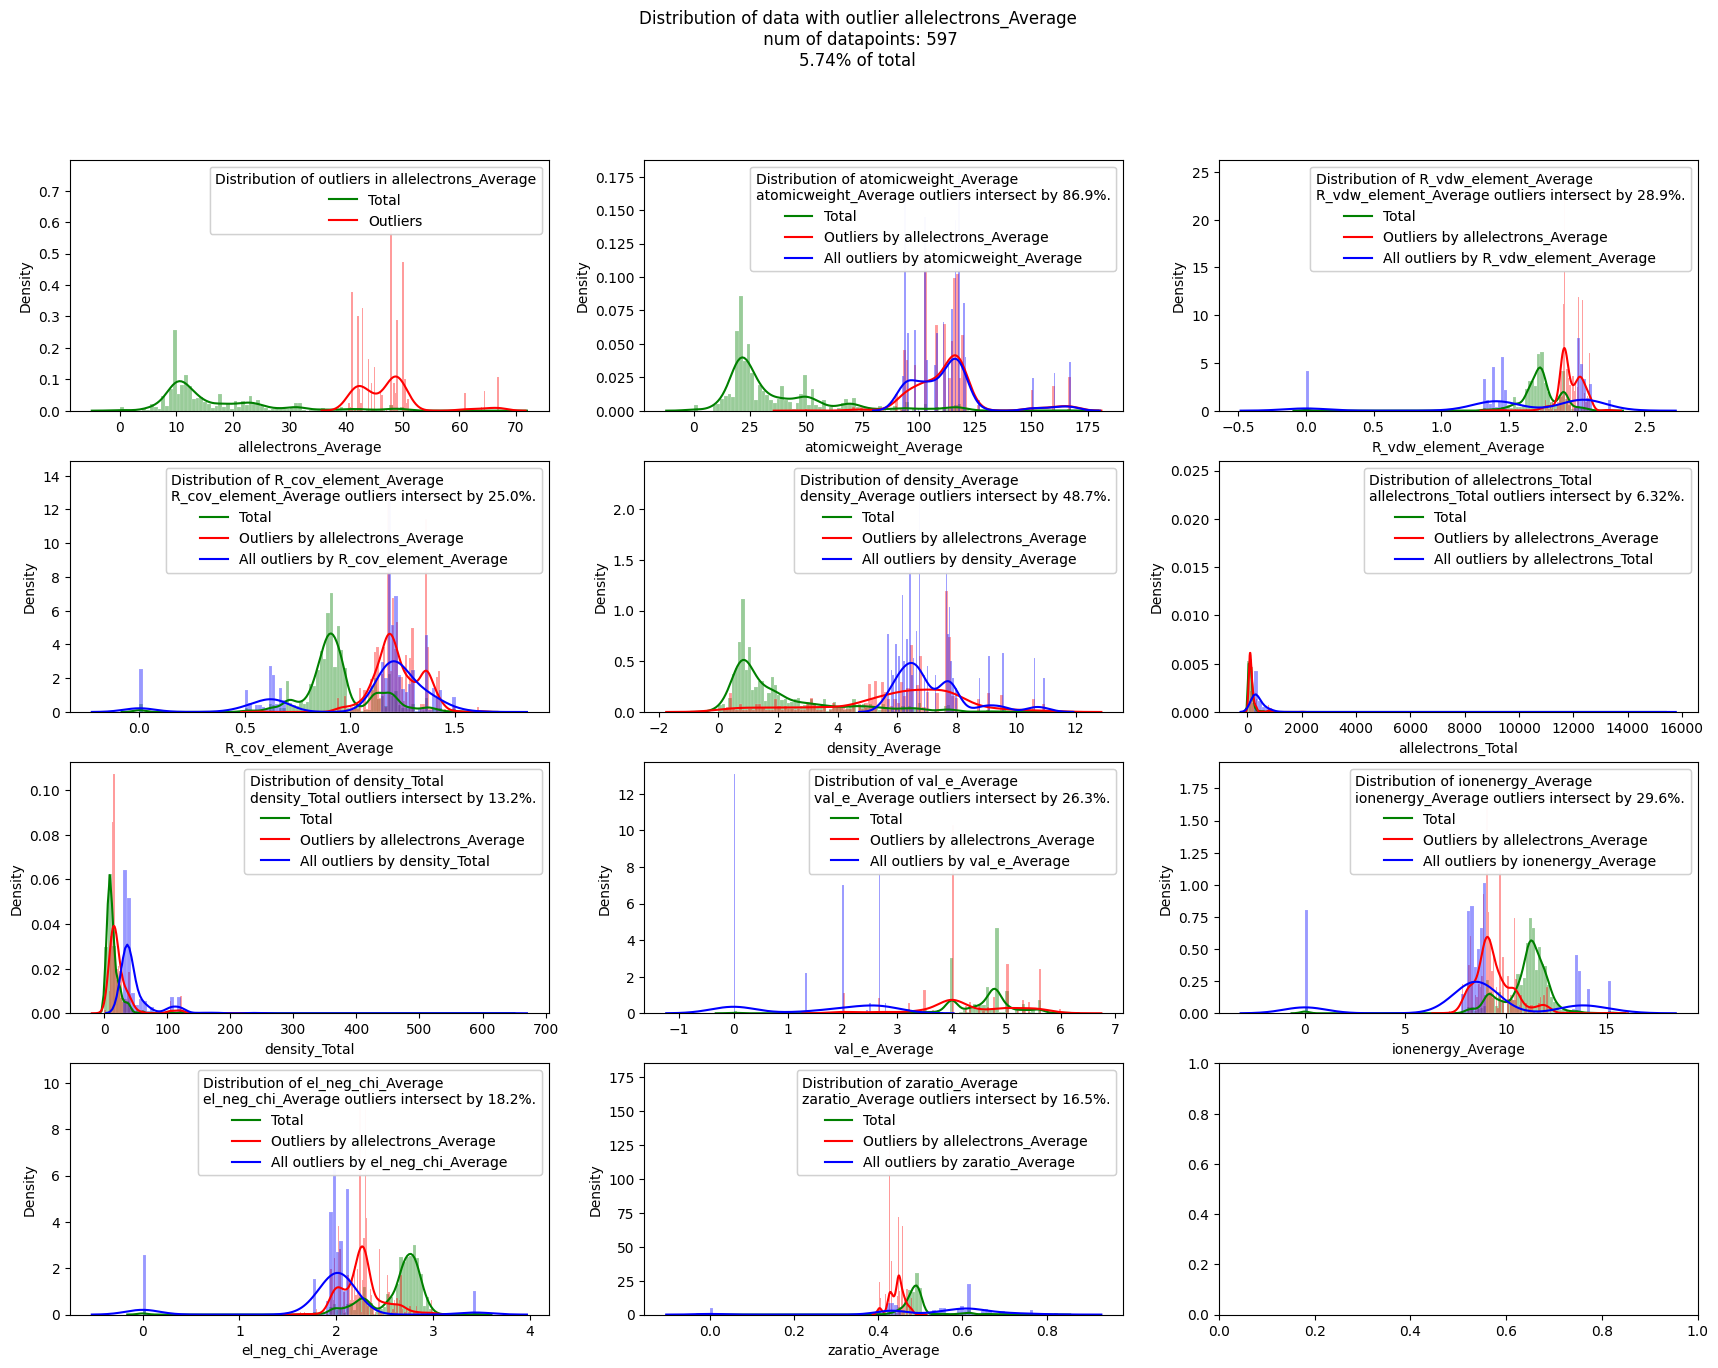

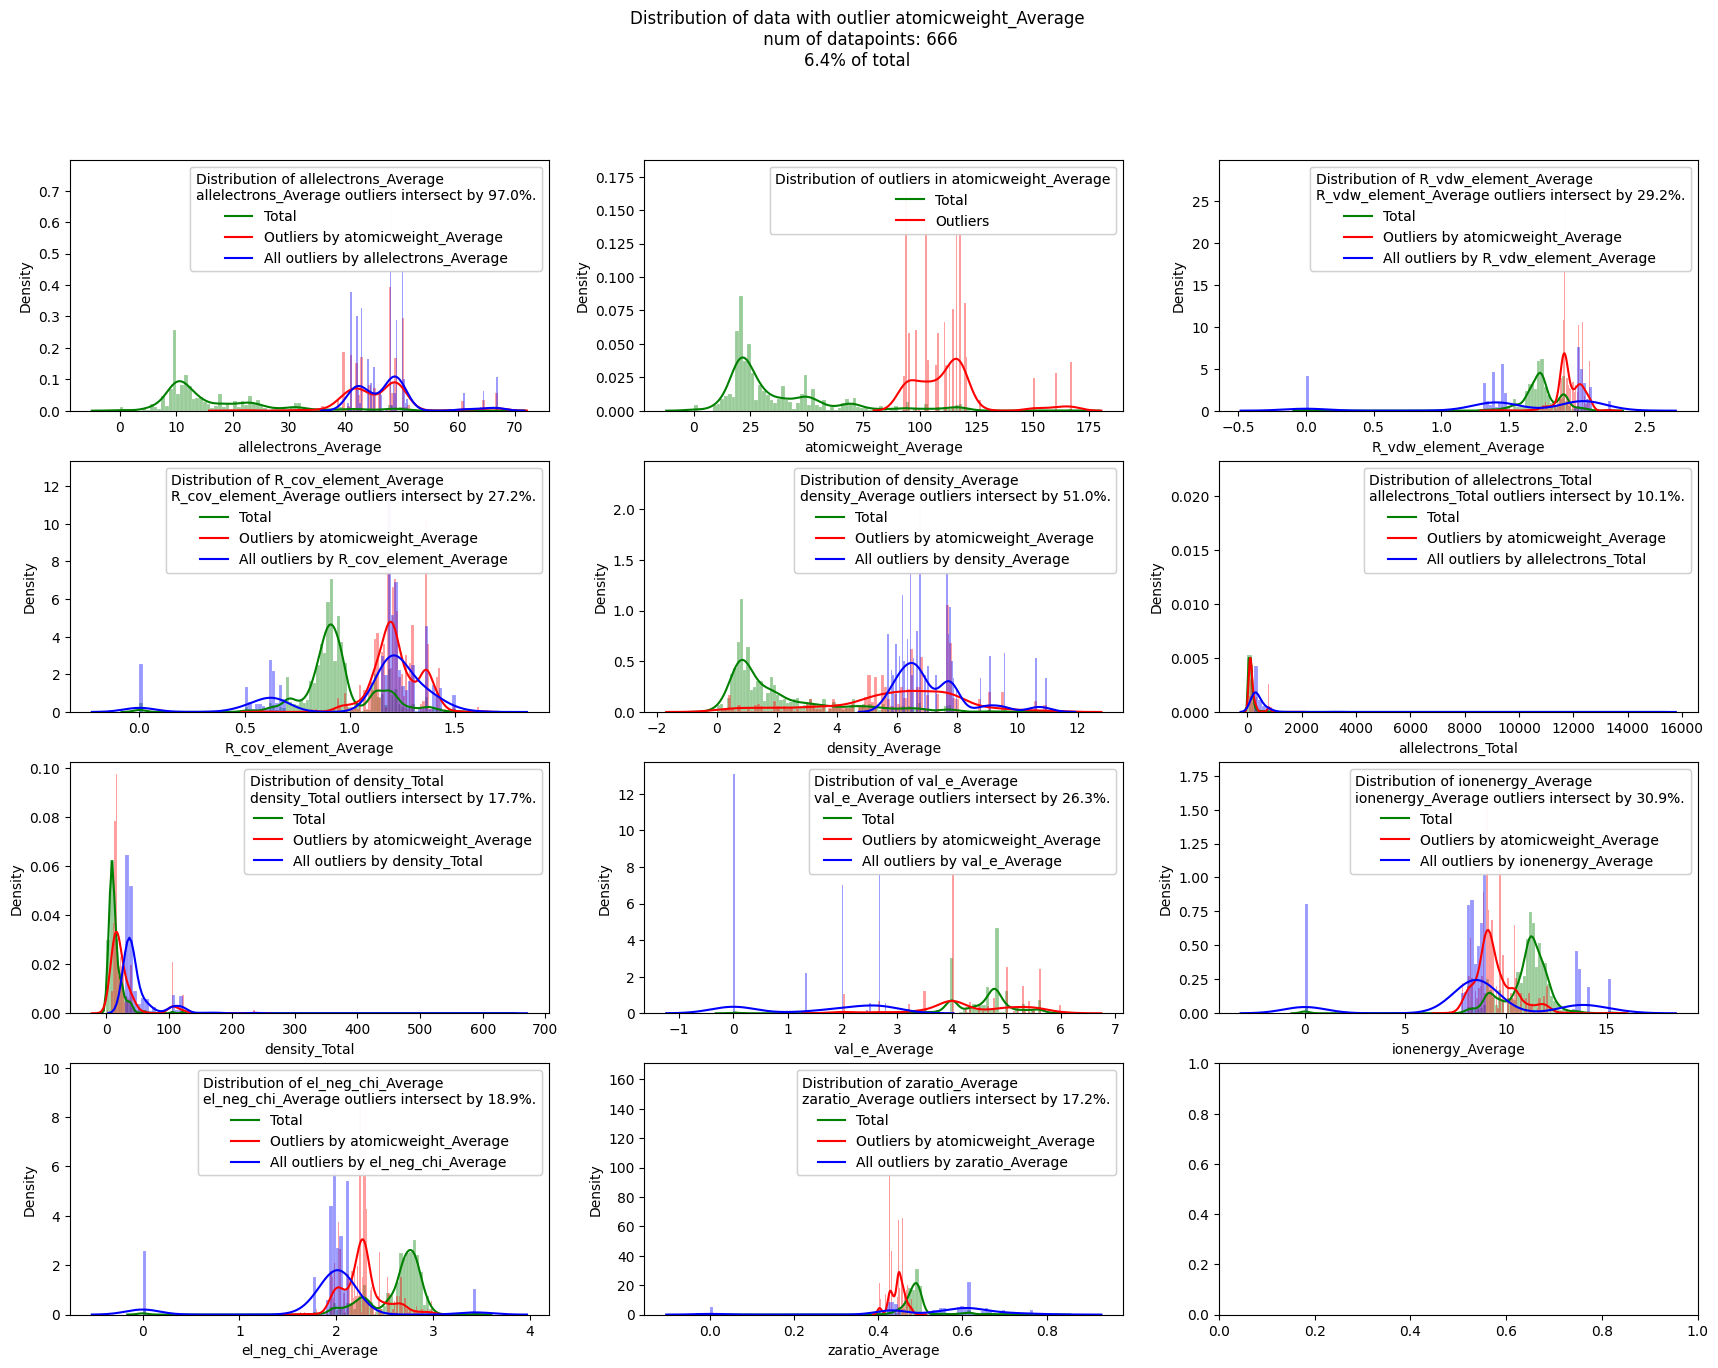

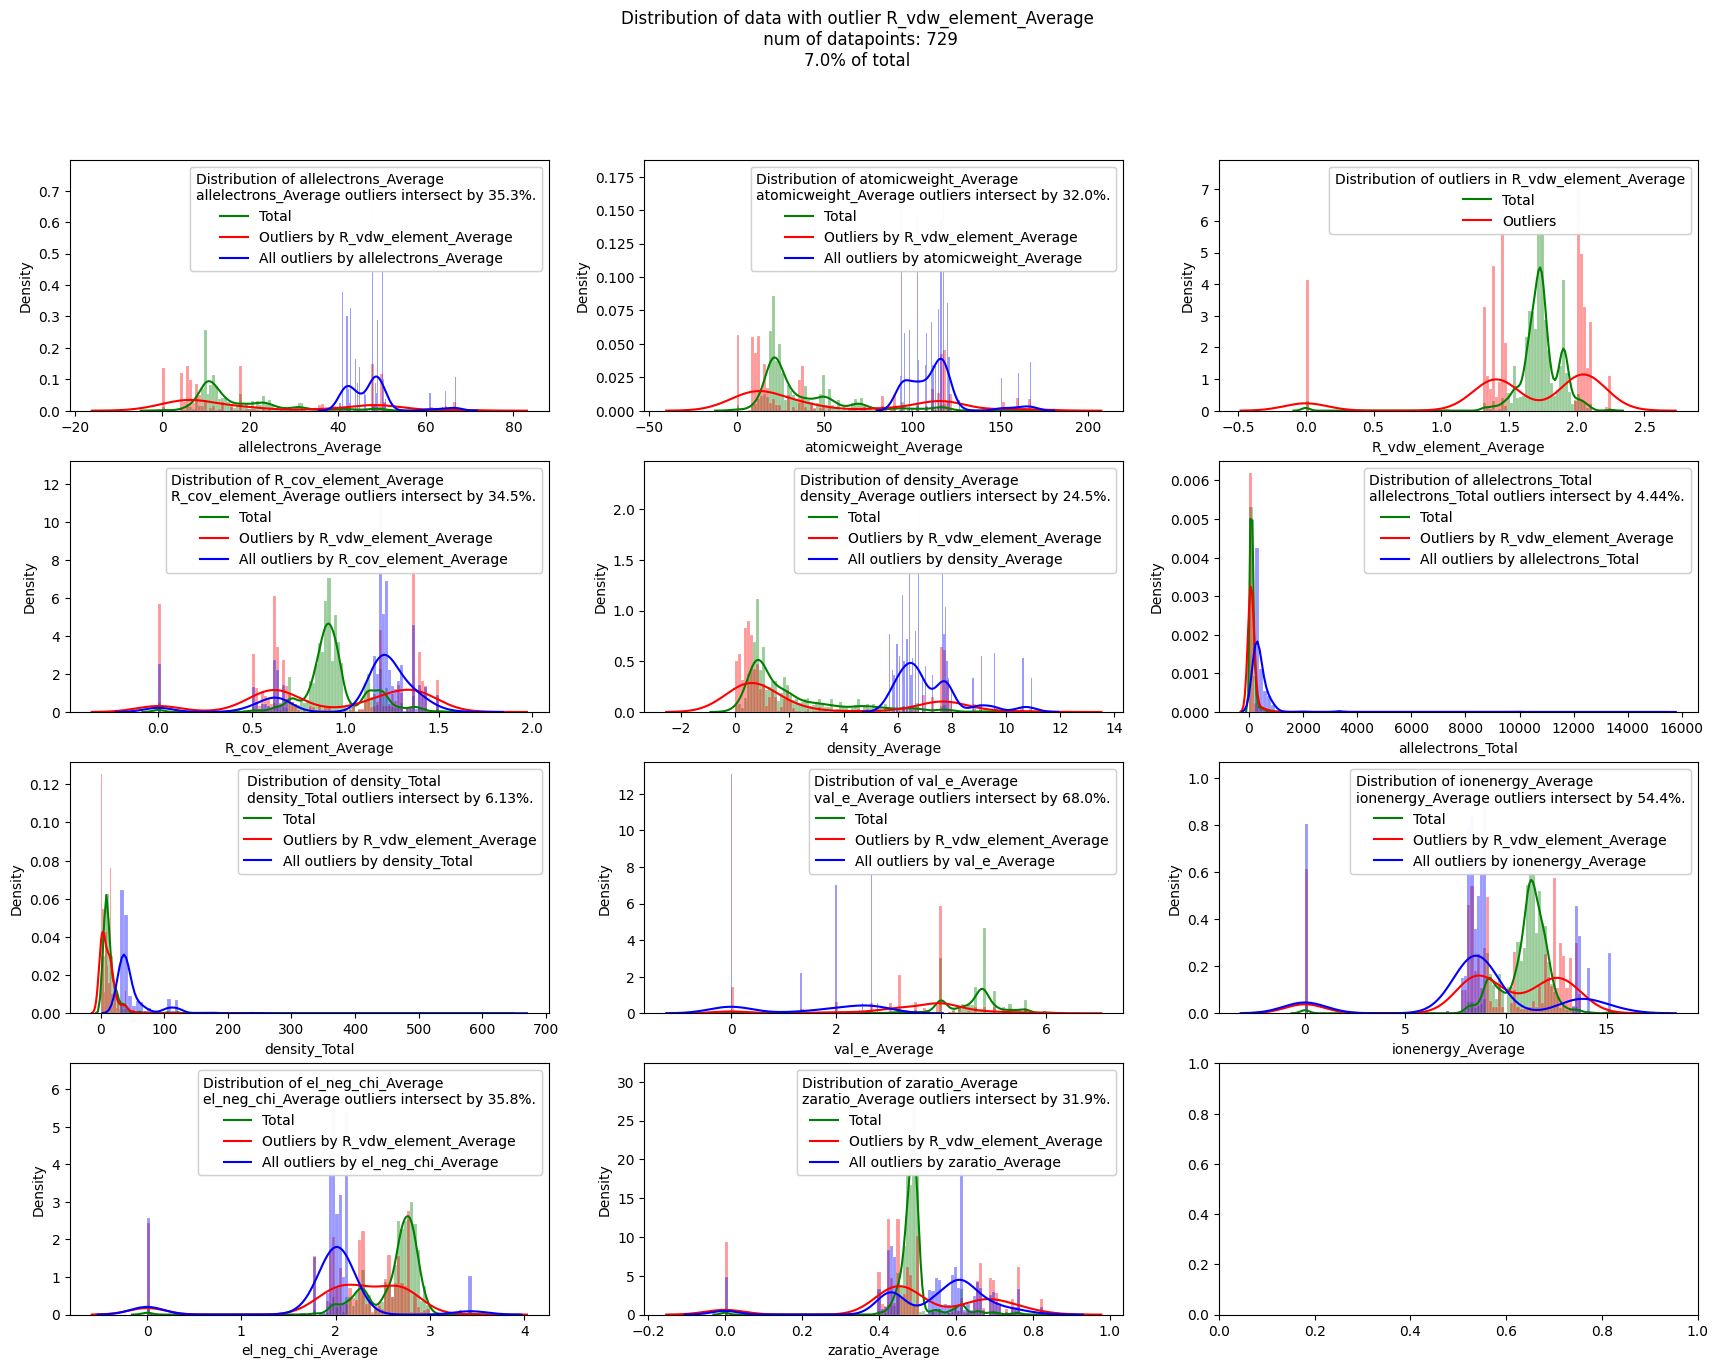

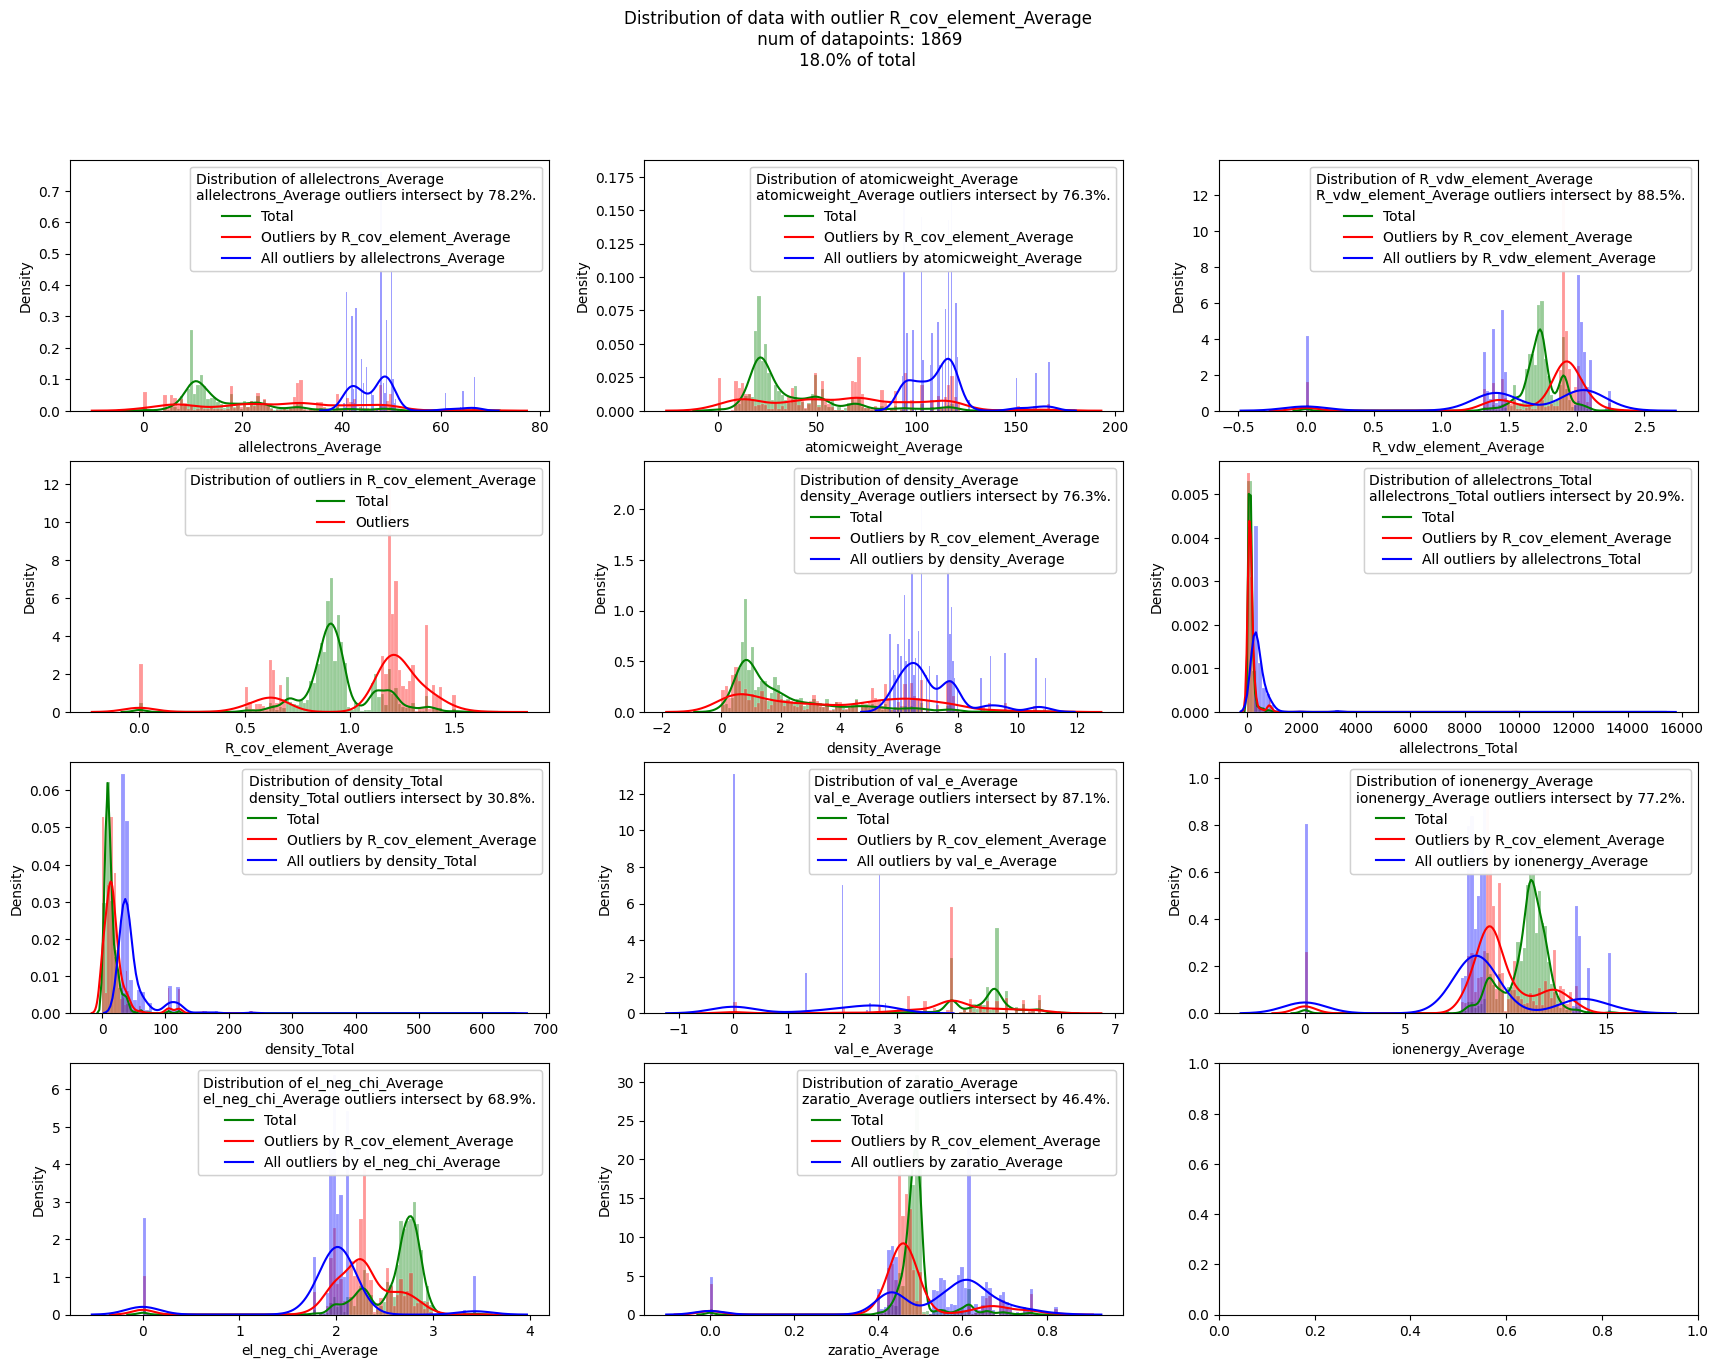

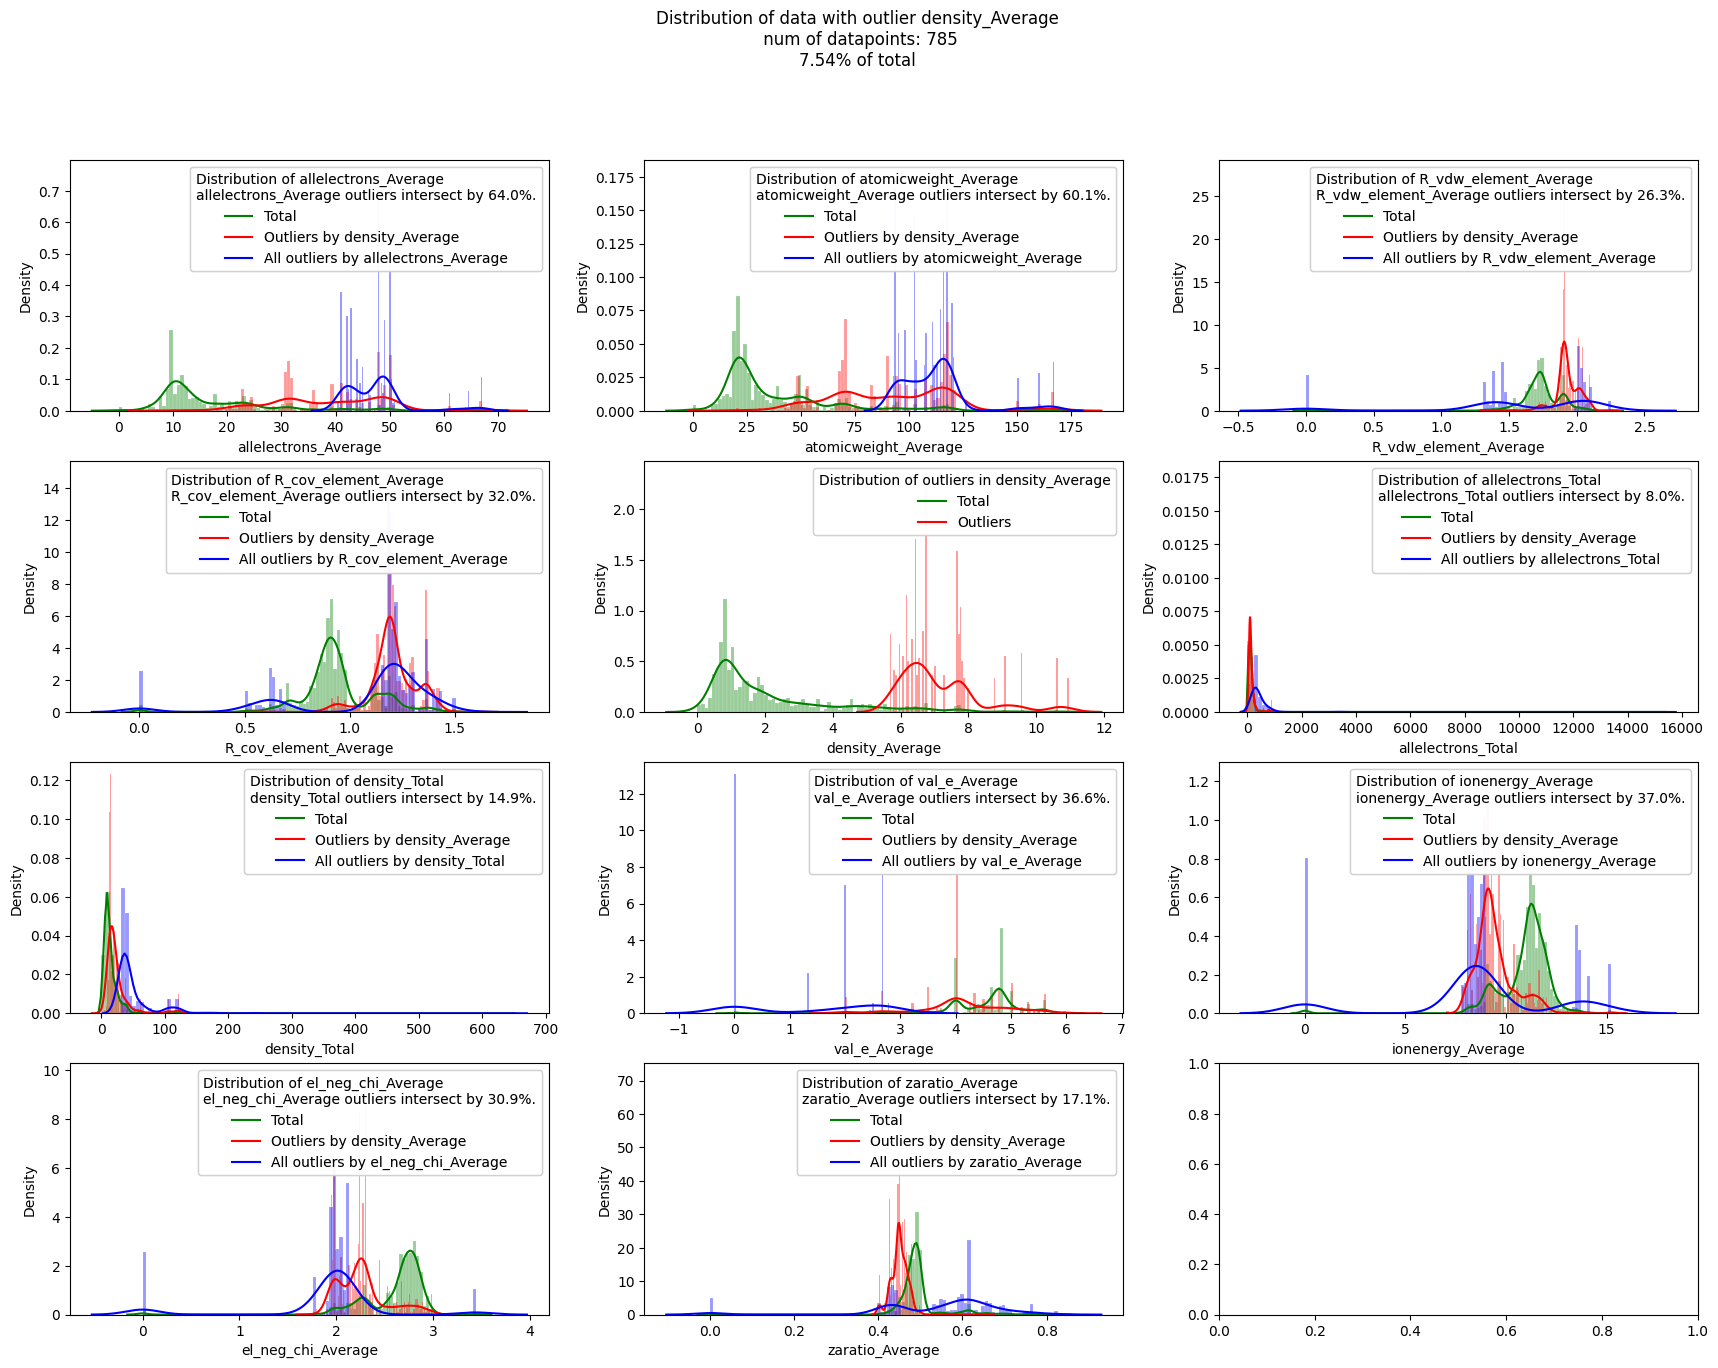

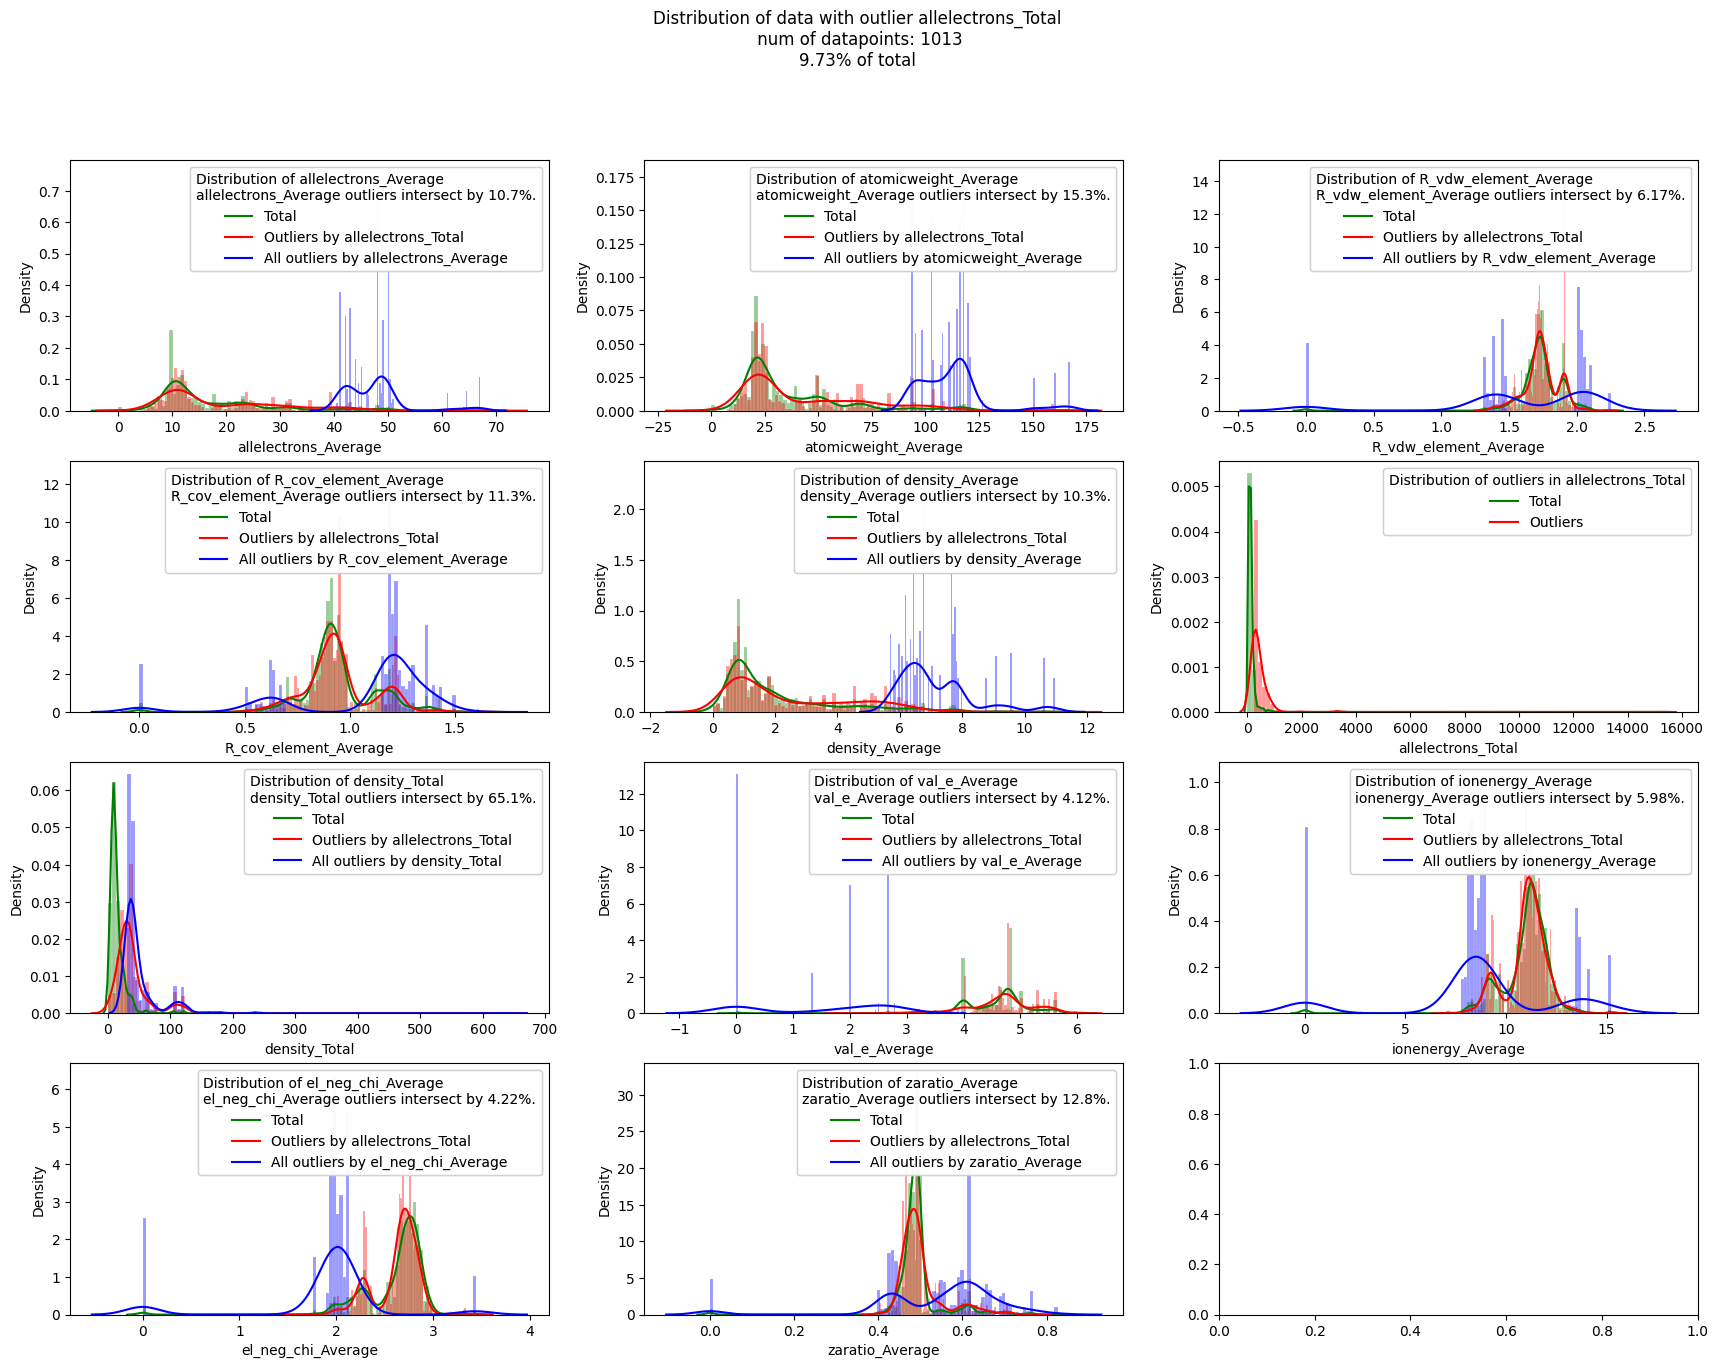

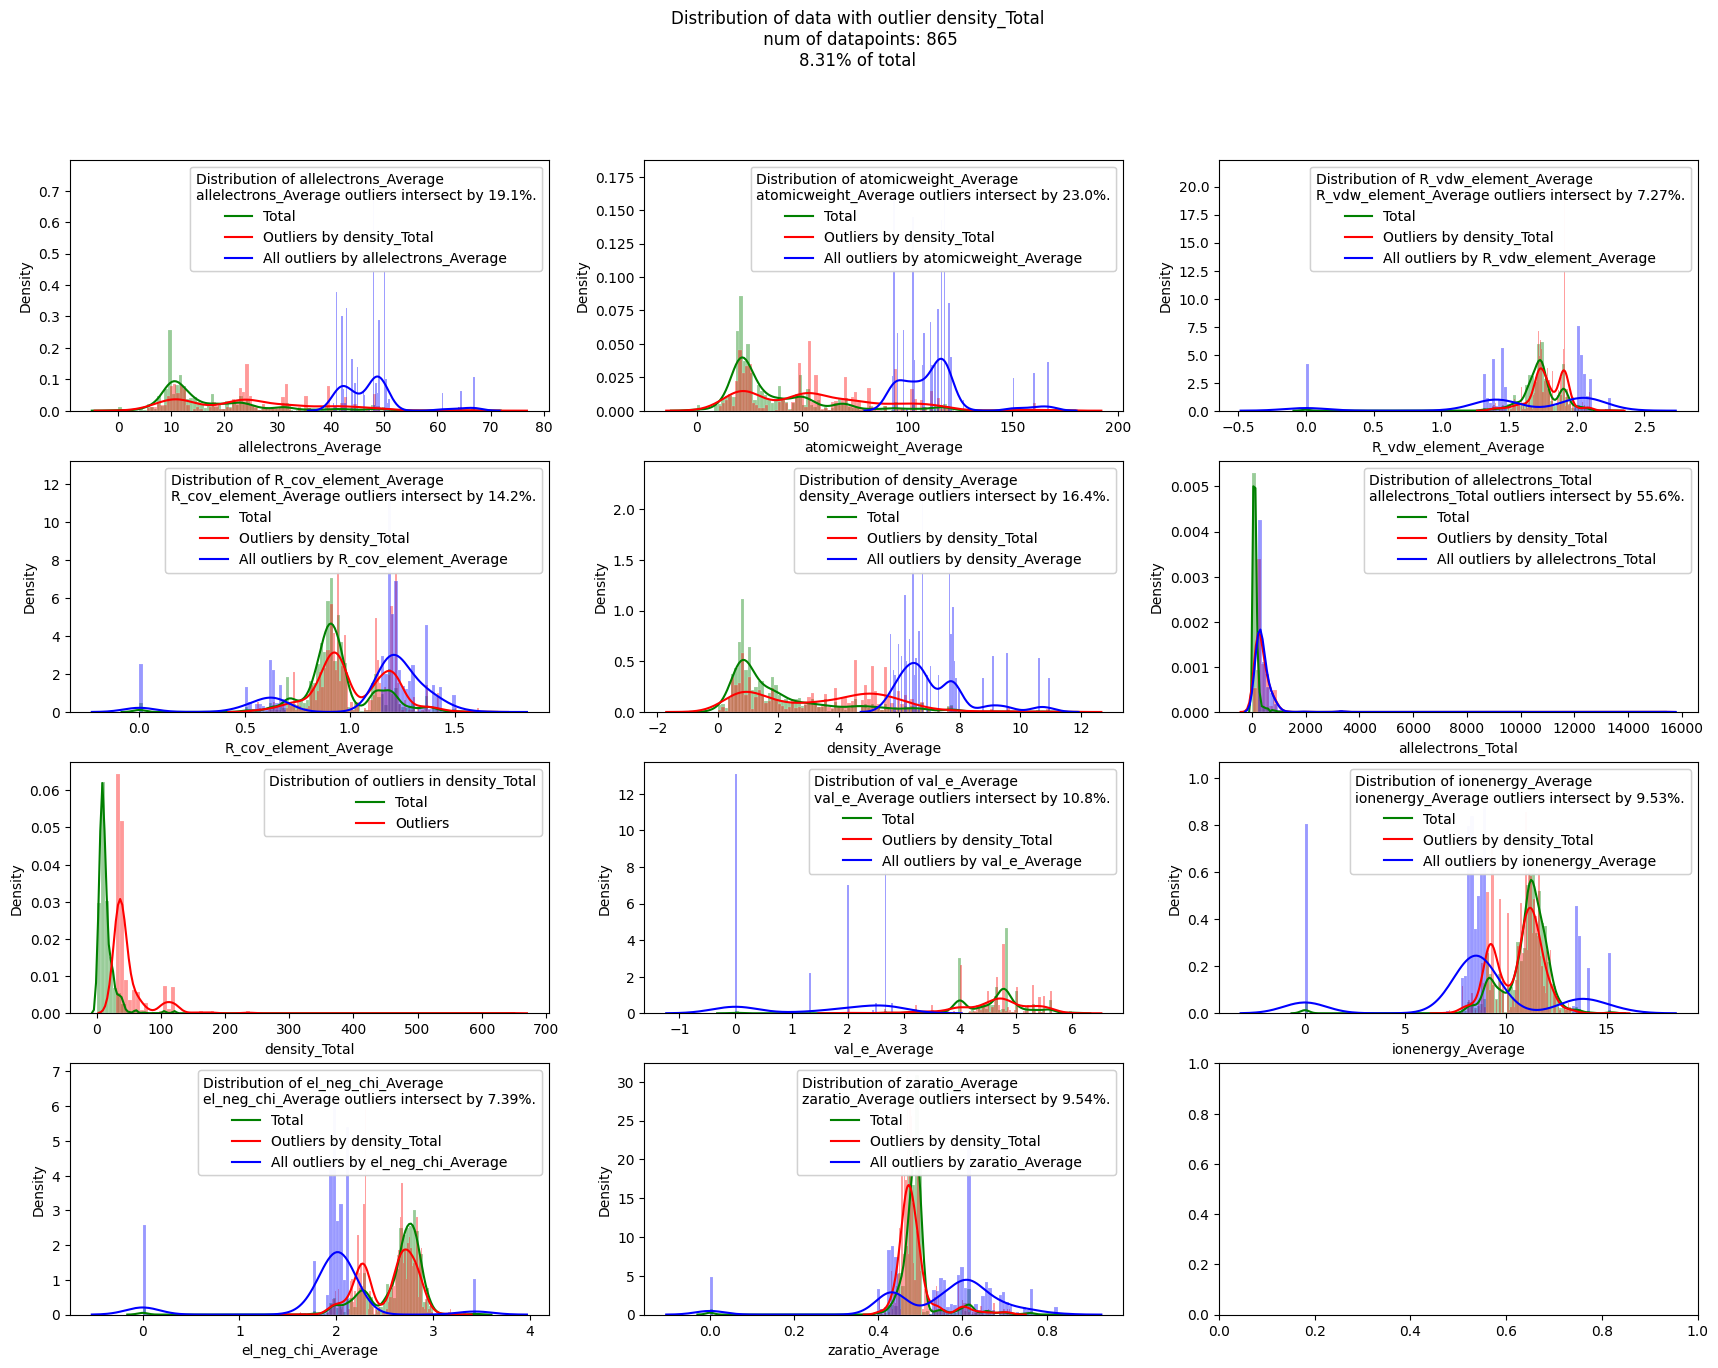

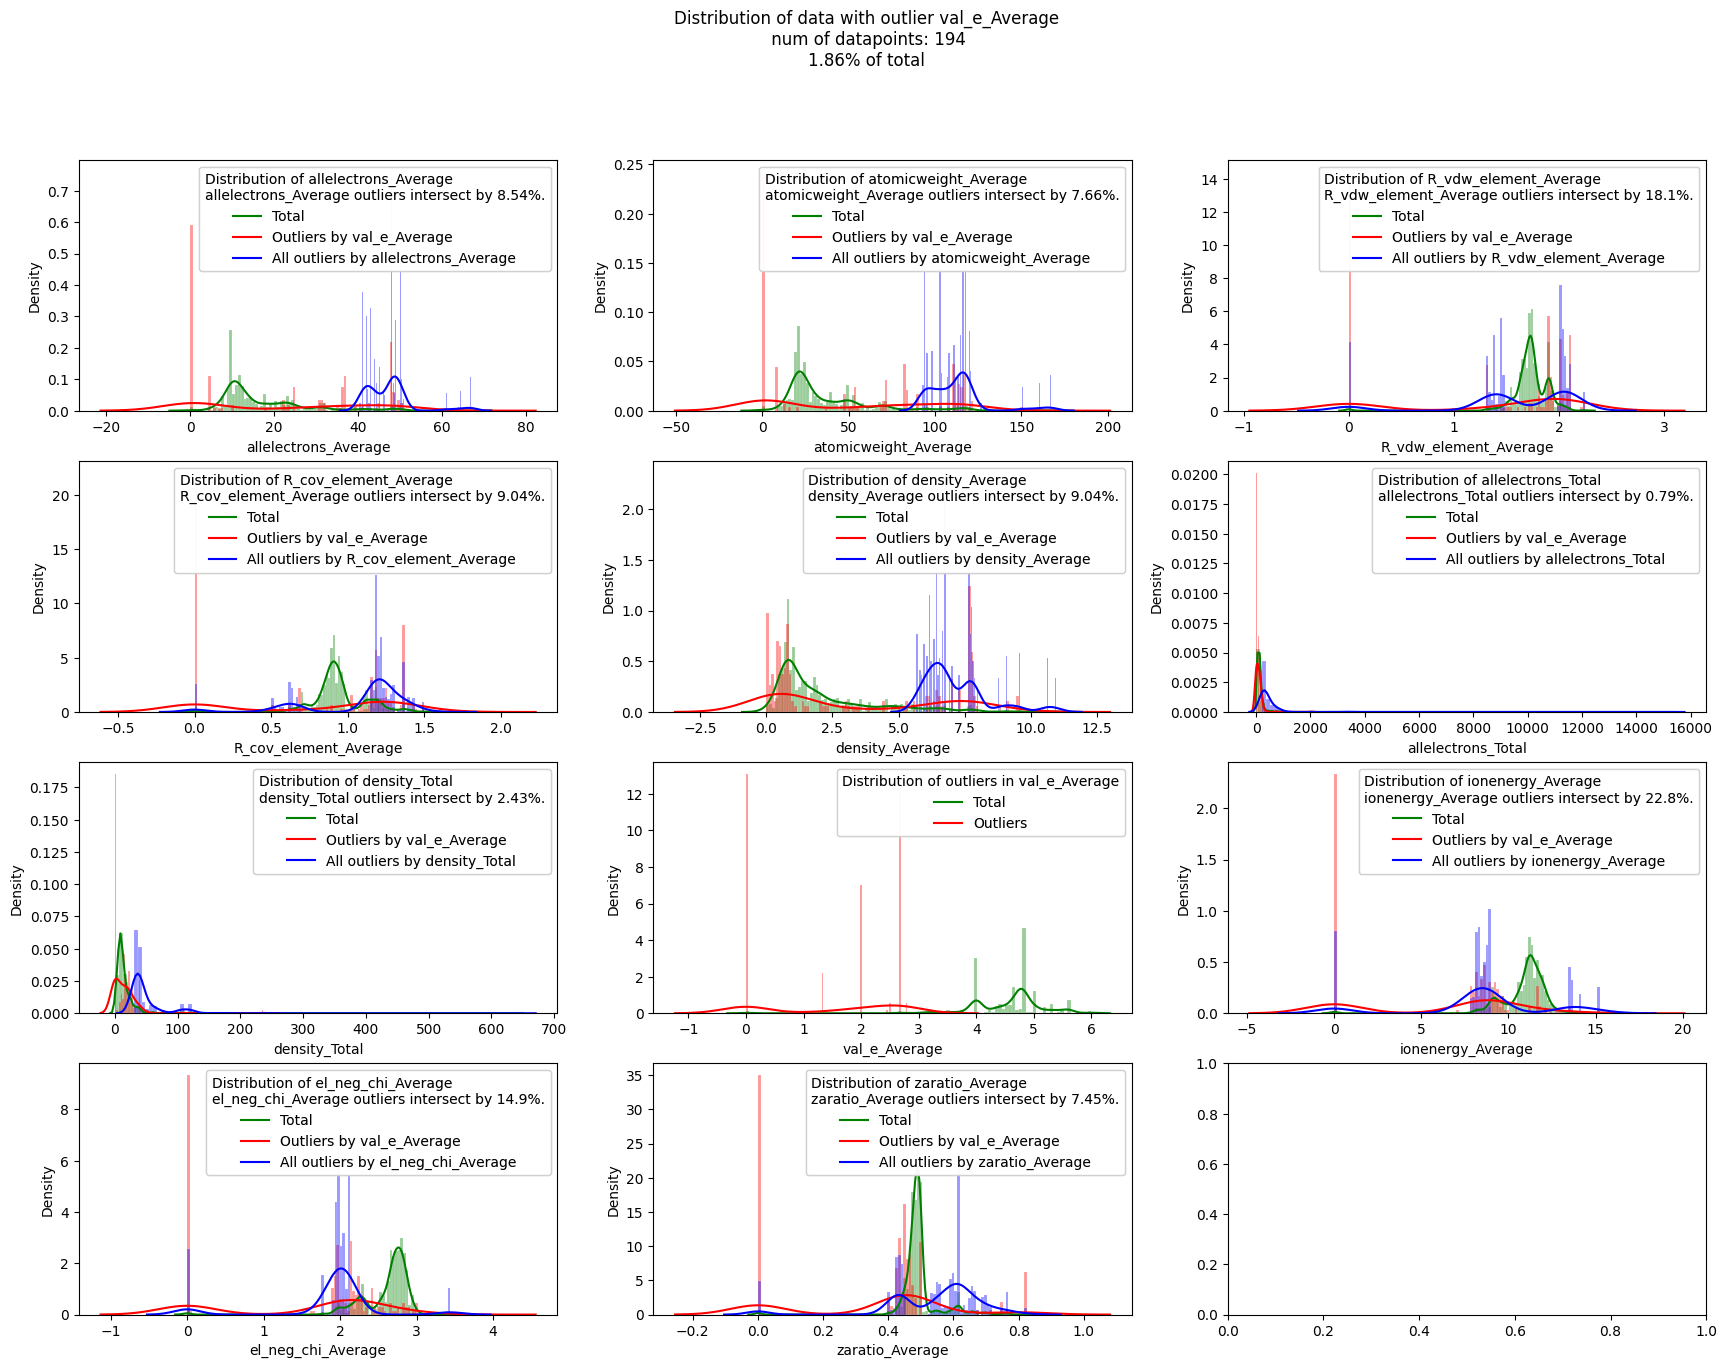

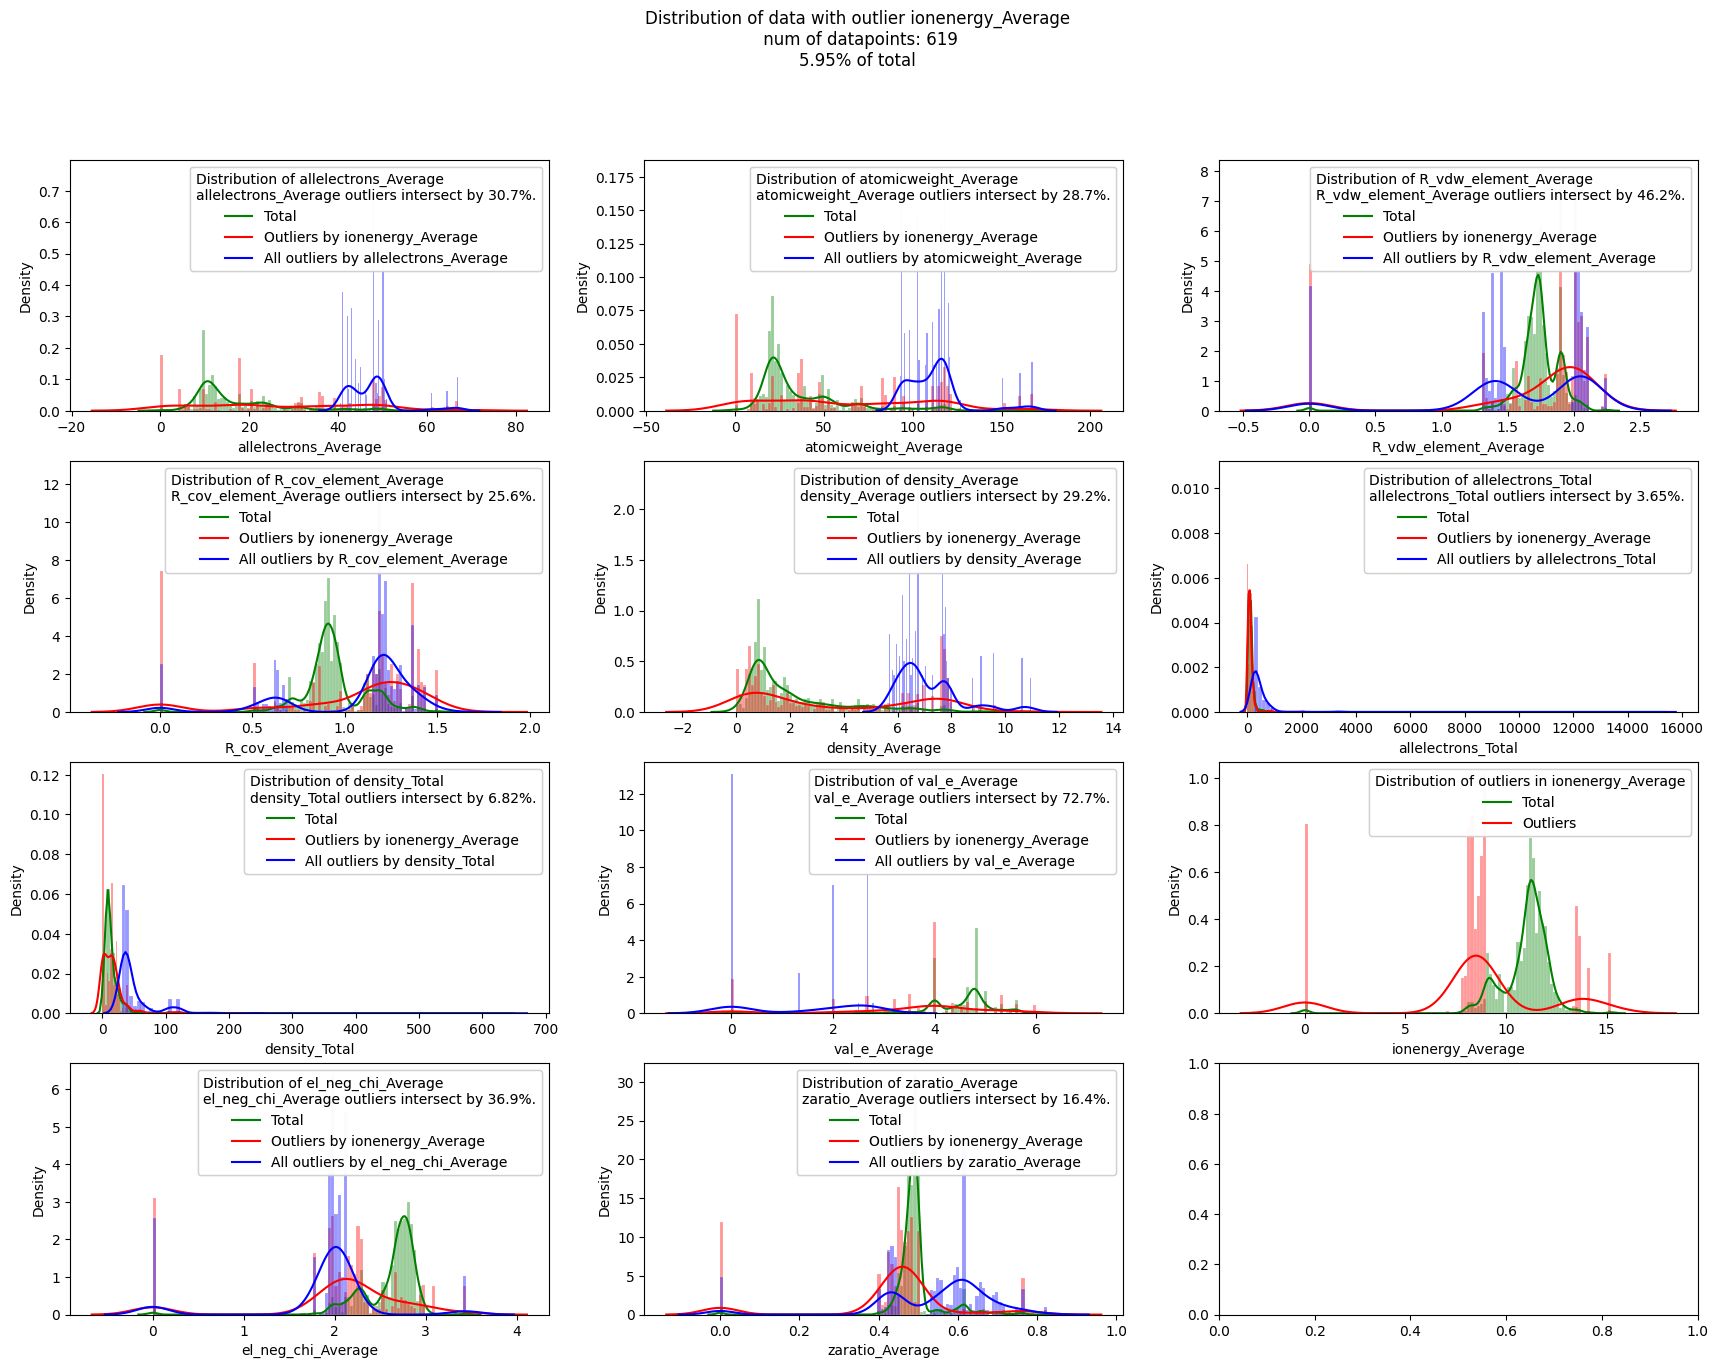

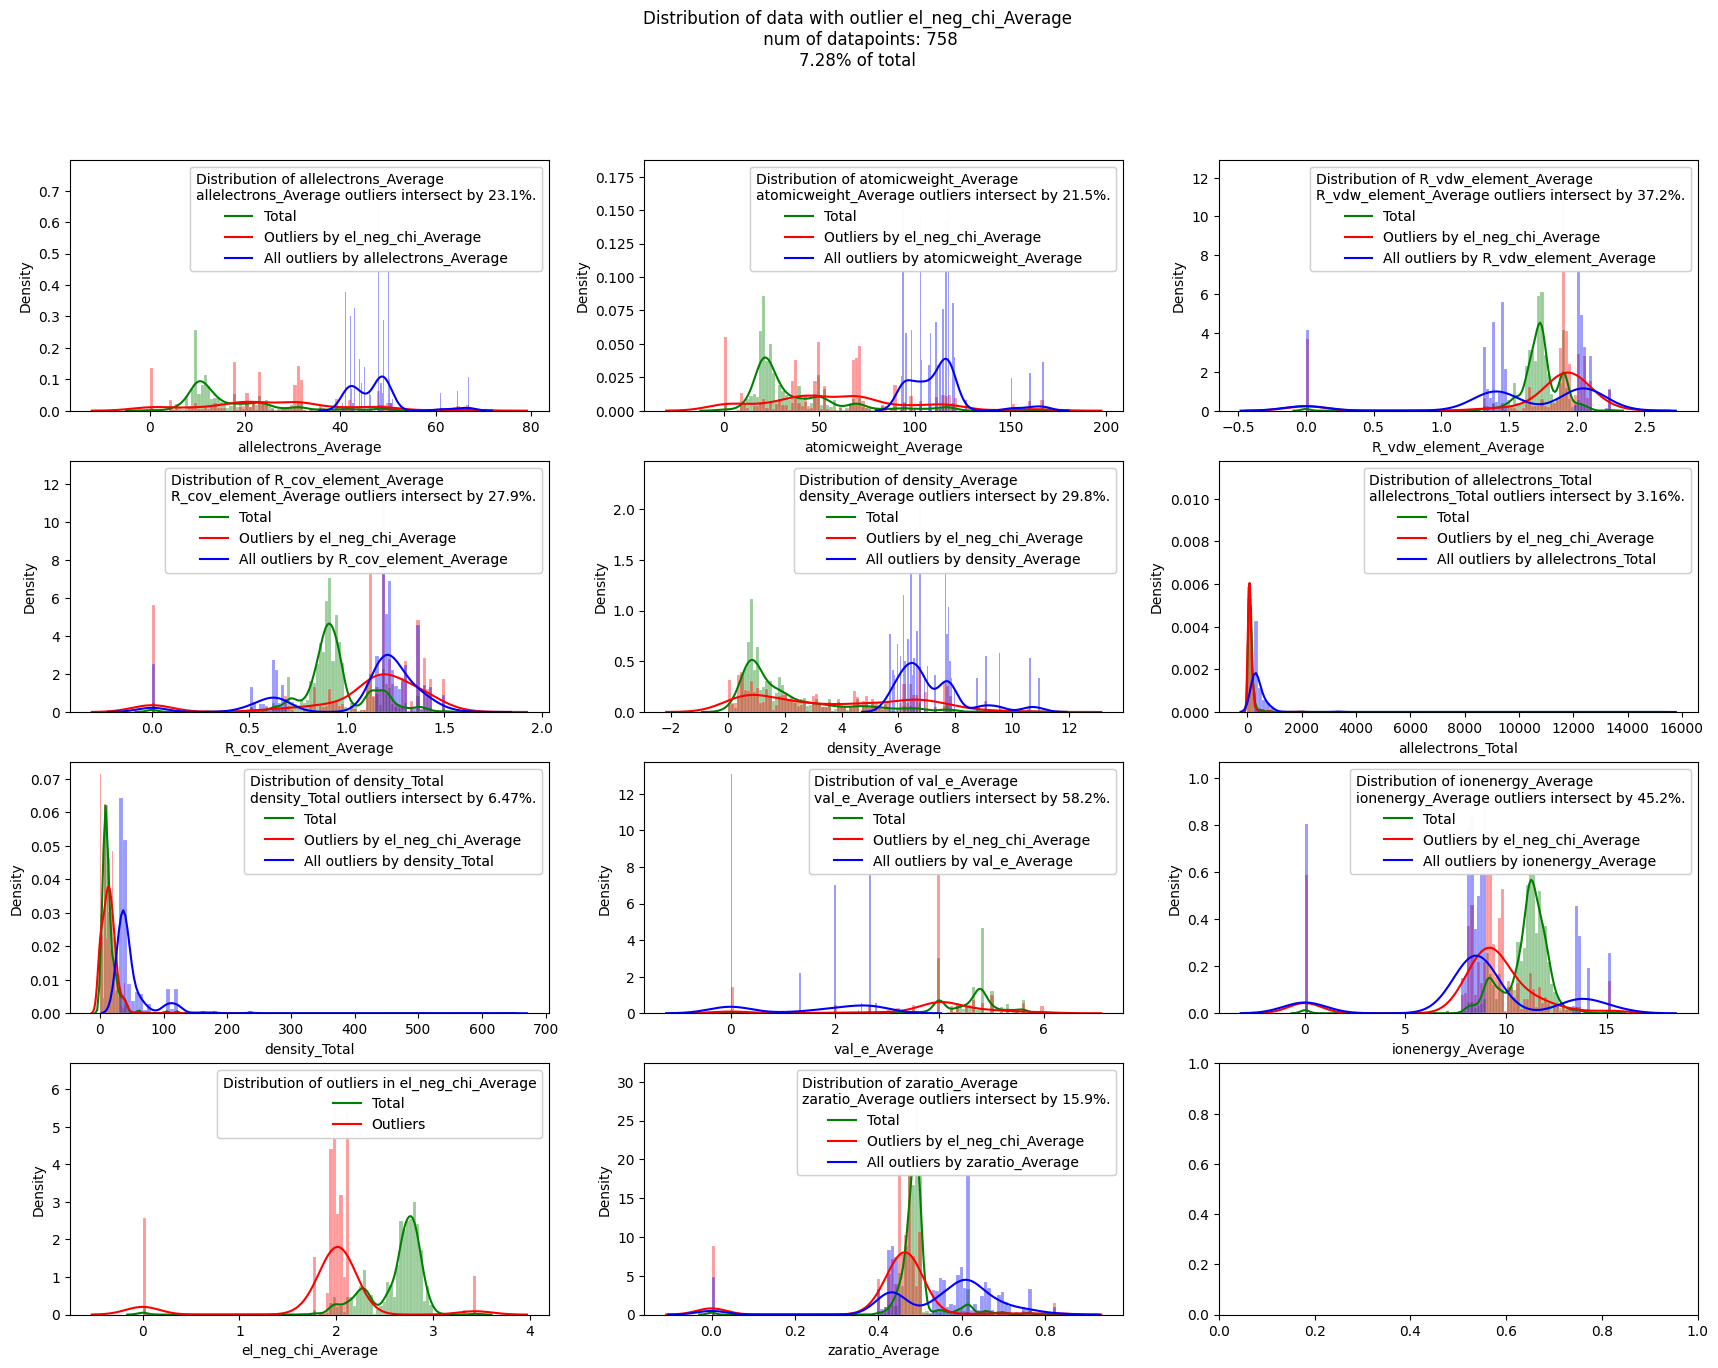

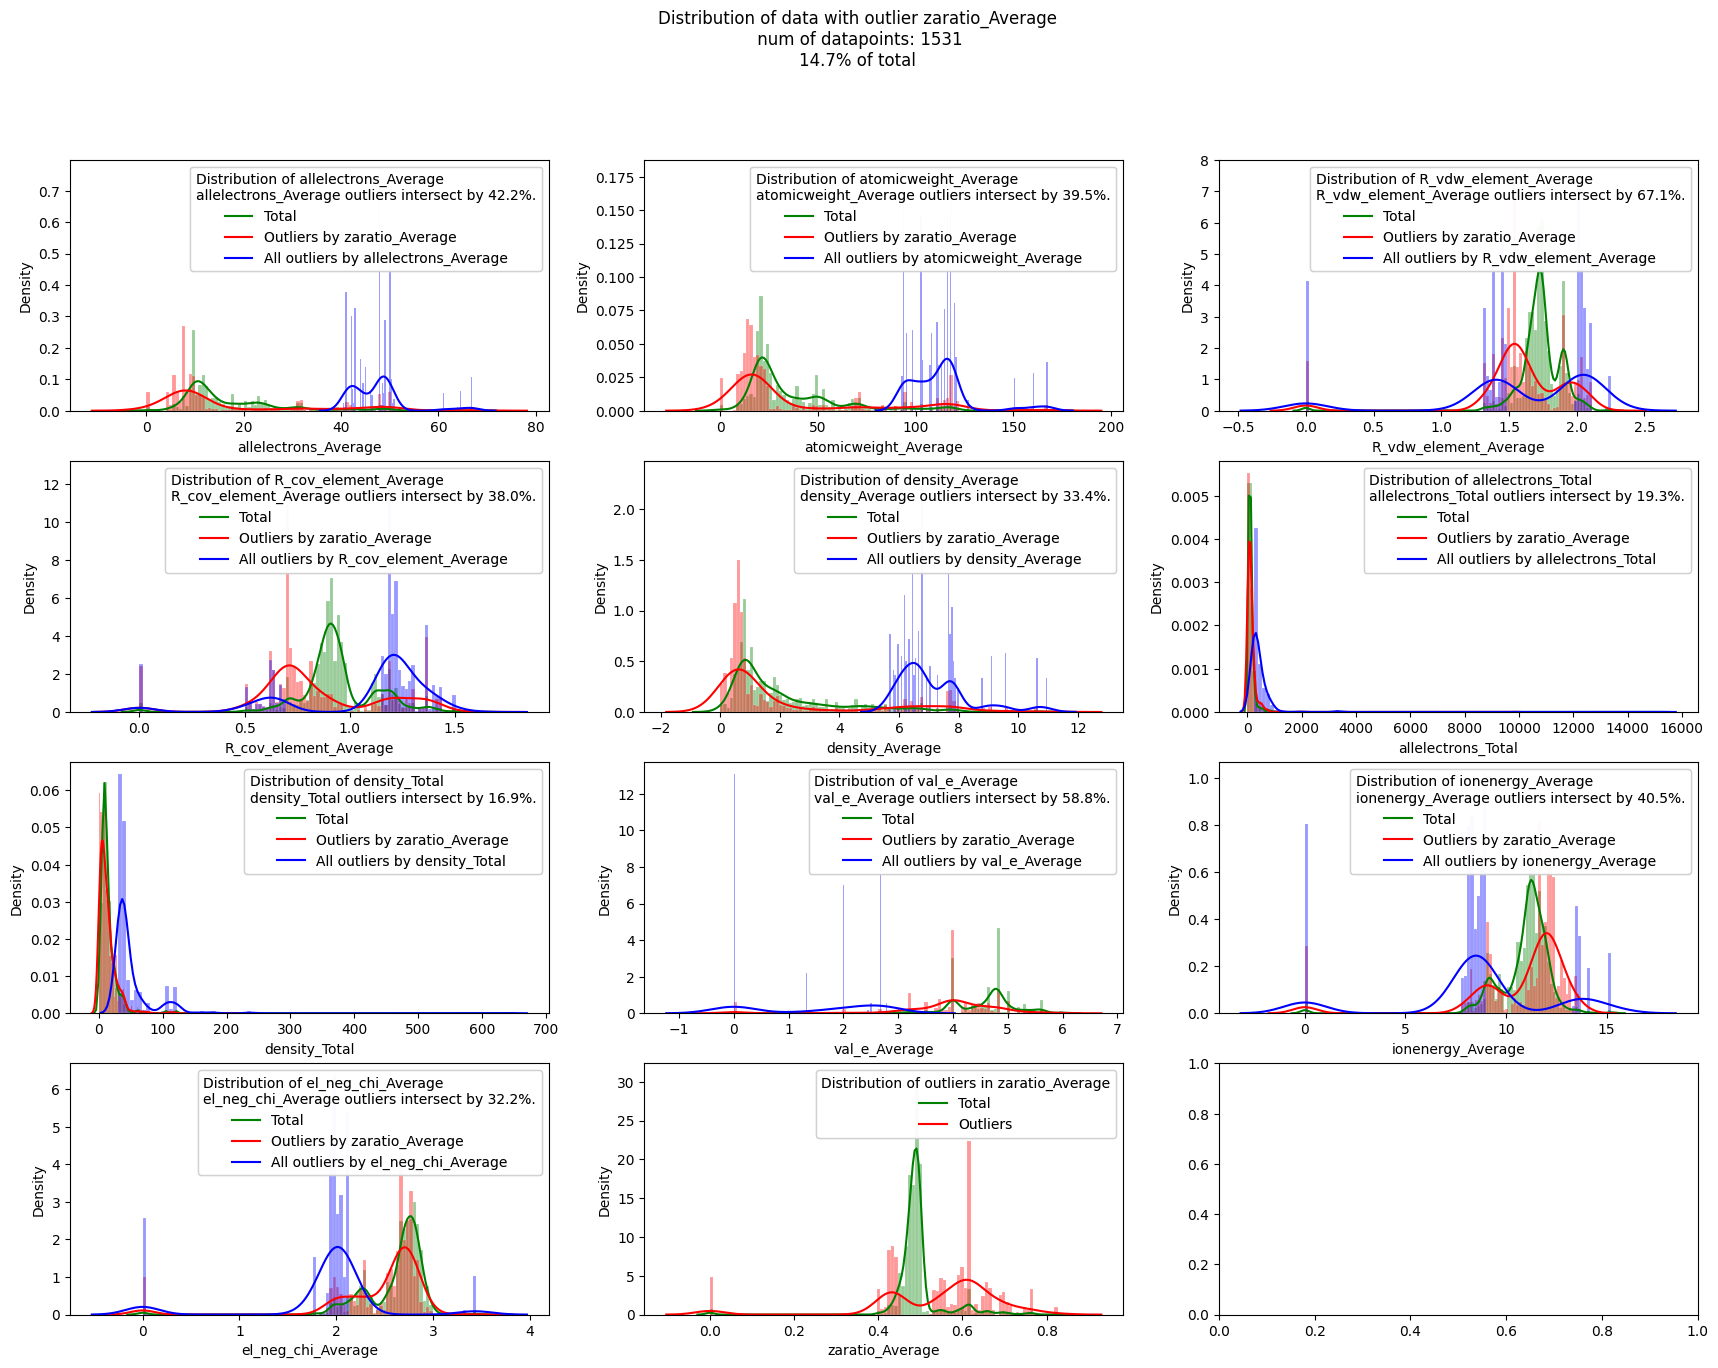

In [38]:
outliers_stats = {}
for col in columns_of_interest_clustered:
    Q1, Q3, IQR = calculate_quantiles_and_IQR(df[col])
    df[f"{col}_outlier"] = False
    df.loc[((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR))), f"{col}_outlier"] = True
    outliers_stats[col] = (df[f"{col}_outlier"] == True).sum()

for col in columns_of_interest_clustered:
    _outlier_by_col_df = df[df[f"{col}_outlier"] == True]
    _outliers_stats = {}
    fig, ax = plt.subplots(round(len(columns_of_interest_clustered) / 3), 3, figsize = (21, 15))
    _total_outlier_percentage = _outlier_by_col_df.shape[0]/df.shape[0]
    for i, ax in enumerate(fig.axes):
        if i == len(columns_of_interest_clustered):
            break
        col2 = columns_of_interest_clustered[i]
        _outliers_stats[col2] = (_outlier_by_col_df[f"{col2}_outlier"]==True).sum()
        
        if outliers_stats[col2] != 0:
            _percentage = _outliers_stats[col2]/outliers_stats[col2]
        else:
            _percentage = 0.0
        
        fig, ax = distribution_plot(df[col2], color='g', ax=ax, fig=fig)
        fig, ax = distribution_plot(_outlier_by_col_df[col2], color='r', ax=ax, fig=fig)
        
        if col == col2:
            labels = ["Total", "Outliers"]
            legend = ax.legend(labels=labels, title=f"Distribution of outliers in {col}")
        else:
            _outlier_by_col2_df = df[df[f"{col2}_outlier"] == True]
            fig, ax = distribution_plot(_outlier_by_col2_df[col2], color='b', ax=ax, fig=fig)
            labels = [f"Total", f"Outliers by {col}", f"All outliers by {col2}"]
            legend = ax.legend(labels=labels, title=f"Distribution of {col2}\n{col2} outliers intersect by {_percentage*100:.3}%.")
        
        ax.add_artist(legend)
    fig.suptitle(f"Distribution of data with outlier {col}\n num of datapoints: {_outlier_by_col_df.shape[0]}\n{_total_outlier_percentage*100:.3}% of total")

As it is seen, some outliers are definitely "outlying" together. 

#### ToDo
* Analyse these plots
* Is it possible to create clusters by outliers? This would allow us to create utilize outliers instead of just leaving them.
* Try to predict value of the outlier if it was not an outlier

## Train and Test
Taking in consideration the number of datapoints, we can use KFold set to tune hyperparameters.


* 90% – training set
* 10% - testing set

In [39]:
# Repeating in case we have accidentally modified train_table earlier
train_table = pd.read_csv("./train.csv")

# With this we can rely on autocorrection
ALLELECTRONS_TOTAL = "allelectrons_Total"
DENSITY_TOTAL = "density_Total"
ALLELECTRONS_AVERAGE = "allelectrons_Average"
VAL_E_AVERAGE = "val_e_Average"
ATOMICWEIGHT_AVERAGE = "atomicweight_Average"
IONENERGY_AVERAGE = "ionenergy_Average"
EL_NEG_CHI_AVERAGE = "el_neg_chi_Average"
R_VDW_ELEMENT_AVERAGE = "R_vdw_element_Average"
R_COV_ELEMENT_AVERAGE = "R_cov_element_Average"
ZARATIO_AVERAGE = "zaratio_Average"
DENSITY_AVERAGE = "density_Average"

HARDNESS = "Hardness"
TARGET = HARDNESS

columns_of_interest = [
    ALLELECTRONS_TOTAL, DENSITY_TOTAL, ALLELECTRONS_AVERAGE, 
    VAL_E_AVERAGE, ATOMICWEIGHT_AVERAGE, IONENERGY_AVERAGE, 
    EL_NEG_CHI_AVERAGE, R_VDW_ELEMENT_AVERAGE, R_COV_ELEMENT_AVERAGE,
    ZARATIO_AVERAGE, DENSITY_AVERAGE]
target_column = [TARGET]

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_table[columns_of_interest], train_table[target_column], test_size=0.1, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((9366, 11), (1041, 11), (9366, 1), (1041, 1))

## Training

[Median absolute error](https://scikit-learn.org/stable/modules/model_evaluation.html#median-absolute-error)

Ideas:
* remove outliers

In [41]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 10


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import median_absolute_error

scorer = make_scorer(median_absolute_error, greater_is_better=False)
randomForest = RandomForestRegressor(criterion="absolute_error", random_state=1, max_depth=10)  # absolute_error != median of absolute_error

first_pipeline = make_pipeline(preprocessing.StandardScaler(), randomForest)

results_max_depth_10=cross_val_score(first_pipeline, X_train, y_train.values.ravel(), cv=10, scoring=scorer, verbose=1, n_jobs=8)
np.abs(np.mean(results_max_depth_10))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:  3.1min remaining:  2.1min
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:  5.7min finished


0.5364000000000003

Doesn't look too good. May be we can do better if we remove max_depth param.

In [43]:
scorer = make_scorer(median_absolute_error, greater_is_better=False)
randomForest = RandomForestRegressor(criterion="absolute_error", random_state=1)  # absolute_error != median of absolute_error

first_pipeline = make_pipeline(preprocessing.StandardScaler(), randomForest)

results=cross_val_score(first_pipeline, X_train, y_train.values.ravel(), cv=10, scoring=scorer, verbose=1, n_jobs=8)
np.abs(np.mean(results))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:  5.4min remaining:  3.6min
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed: 10.5min finished


0.6657299999999998

It only got worse. Overfitting?

In [44]:
scorer = make_scorer(median_absolute_error, greater_is_better=False)
randomForest = RandomForestRegressor(criterion="absolute_error", random_state=1, max_depth=5)  # absolute_error != median of absolute_error

first_pipeline = make_pipeline(preprocessing.StandardScaler(), randomForest)

results_5=cross_val_score(first_pipeline, X_train, y_train.values.ravel(), cv=10, scoring=scorer, verbose=1, n_jobs=8)
np.abs(np.mean(results_5))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:  2.2min remaining:  1.5min
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:  4.2min finished


0.5558250000000013

PLSRegression?

In [45]:
from sklearn.cross_decomposition import PLSRegression

median_absolute_scorer = make_scorer(median_absolute_error, greater_is_better=False)

def variate_num_of_components(X, y, 
                              pipeline_list, 
                              cv=10, 
                              test_range=None, 
                              scale=False, 
                              scorer=median_absolute_scorer):
    results = []
    if test_range is None:
        test_range = range(1, 12)
    for n_comp in test_range:
        print(f"Checking {n_comp} components")
        if n_comp > X.shape[1]:
            break
        model = PLSRegression(n_components=n_comp, scale=scale)
        pipe = make_pipeline(*pipeline_list, model)
        scores = cross_val_score(pipe, X, y, cv=cv, scoring=scorer, n_jobs=8)
        res = np.abs(np.mean(scores))
        results.append([n_comp, res])
    ret = pd.DataFrame(results, columns=["n_components", "result"])
    return ret

scaler = preprocessing.StandardScaler()

pipeline = [scaler]
pls_components_df = variate_num_of_components(X_train, y_train, pipeline, cv=10, scale=True)
pls_components_df

Checking 1 components
Checking 2 components
Checking 3 components
Checking 4 components
Checking 5 components
Checking 6 components
Checking 7 components
Checking 8 components
Checking 9 components
Checking 10 components
Checking 11 components


n_components    result
0              1  1.073097
1              2  0.987417
2              3  0.966255
3              4  0.960158
4              5  0.956734
5              6  0.953914
6              7  0.954088
7              8  0.953392
8              9  0.952557
9             10  0.954628
10            11  0.953760

In [46]:
columns_no_R_cov = columns_of_interest.copy()
columns_no_R_cov.pop(columns_no_R_cov.index('R_cov_element_Average'))

columns_no_zaratio = columns_of_interest.copy()
columns_no_zaratio.pop(columns_no_R_cov.index('zaratio_Average'))

columns_no_R_cov_zaratio = columns_no_R_cov.copy()
columns_no_R_cov_zaratio.pop(columns_no_R_cov.index('zaratio_Average'))

df = train_table.copy()
no_R_cov_df = df[columns_no_R_cov]
no_zaratio_df = df[columns_no_zaratio]
no_R_cov_zaratio_df = df[columns_no_R_cov_zaratio]

Q1, Q3, IQR = calculate_quantiles_and_IQR(df)
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_R_cov_df)
R_cov_df_outliers = df[~((no_R_cov_df < (Q1 - 1.5 * IQR)) |(no_R_cov_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_zaratio_df)
zaratio_df_outliers = df[~((no_zaratio_df < (Q1 - 1.5 * IQR)) |(no_zaratio_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1, Q3, IQR = calculate_quantiles_and_IQR(no_R_cov_zaratio_df)
R_cov_zaratio_df_outliers = df[~((no_R_cov_zaratio_df < (Q1 - 1.5 * IQR)) |(no_R_cov_zaratio_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Let's test our hypothesis that these results will be better (they won't be eventually as we are just ignoring this data!)

In [47]:
X_no_outliers_train, X_no_outliers_test, y_no_outliers_train, y_no_outliers_test = train_test_split(
    df_no_outliers[columns_of_interest], df_no_outliers[target_column], test_size=0.1, random_state=1)

scorer = make_scorer(median_absolute_error, greater_is_better=False)
randomForest = RandomForestRegressor(criterion="absolute_error", random_state=1, max_depth=10)  # absolute_error != median of absolute_error

first_pipeline_no_outliers = make_pipeline(preprocessing.StandardScaler(), randomForest)

results_max_depth_10_no_outliers=cross_val_score(first_pipeline, X_no_outliers_train, y_no_outliers_train.values.ravel(), cv=10, scoring=scorer, verbose=1, n_jobs=8)
np.abs(np.mean(results_max_depth_10_no_outliers))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:   50.5s remaining:   33.6s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:  1.6min finished


0.5250250000000005

Let's replace predictions with closest values from the 37 known ones. 

In [48]:
from sklearn.model_selection import KFold
train_df = train_table.copy()
reference = np.array(hardness_values_total)

for val in outlier_hardness_values:
    train_df = train_df[~(train_df[HARDNESS] == val)]

def replace_with_closest(arr, reference):
    indices = np.array([np.abs(reference - a).argmin() for a in arr])
    return reference[indices]

scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=1)
for fold, (idx_tr, idx_va) in enumerate(kf.split(train_df)):
    print(f"Fold: {fold}")
    X_tr = train_df.iloc[idx_tr].copy() 
    X_va = train_df.iloc[idx_va].copy()
    y_tr = X_tr.pop('Hardness')
    y_va = X_va.pop('Hardness')

    # Fit and score a model without sample weights
    model = RandomForestRegressor(criterion="absolute_error", random_state=1, max_depth=20, n_jobs=8)
    model.fit(X_tr, y_tr)
    predictions = replace_with_closest(model.predict(X_va), reference)
    medae = median_absolute_error(y_va, predictions)
    print(f"score for {fold} iteration: {medae}")
    scores.append(medae)
    
print(f"Total score: {np.mean(scores)}")

Fold: 0
score for 0 iteration: 0.5
Fold: 1
score for 1 iteration: 0.5
Fold: 2
score for 2 iteration: 0.5
Fold: 3
score for 3 iteration: 0.5
Fold: 4
score for 4 iteration: 0.5
Total score: 0.5


May be classifier is better than regressor?

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

train_df = train_table.copy()  # Removing probable outliers
for val in outlier_hardness_values:
    train_df = train_df[~(train_df[HARDNESS] == val)]

train_df[HARDNESS] = train_df[HARDNESS].astype(str)
reference = np.array(hardness_values_total)

def replace_with_closest(arr, reference):
    indices = np.array([np.abs(reference - a).argmin() for a in arr])
    return reference[indices]

scores = []
# Using stratified KFold to ensure that all y are classified
strat_kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
strat_X = train_df.copy()
strat_y = strat_X.pop(HARDNESS)
for fold, (idx_tr, idx_va) in enumerate(strat_kf.split(strat_X, strat_y)):
    print(f"Fold: {fold}")
    X_tr = train_df.iloc[idx_tr].copy()
    y_tr = X_tr.pop(HARDNESS)

    X_va = strat_X.iloc[idx_va].copy()
    y_va = strat_y.iloc[idx_va].copy()
    # Fit and score a model without sample weights

    model = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=8)
    model.fit(X_tr, y_tr)
    predictions = model.predict(X_va)
    #print(sorted(np.abs(y_va.astype(float) - predictions.astype(float))))

    medae = median_absolute_error(y_va.astype(float), predictions.astype(float))
    #print(f"score for {fold} iteration: {medae}")

    scores.append(medae)
    
print(f"Total score: {np.mean(scores)}")


Fold: 0
Fold: 1


/Users/alex/Library/Caches/pypoetry/virtualenvs/kaggle-competitions-wlMf4yjH-py3.11/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Fold: 2
Fold: 3
Fold: 4
Fold: 5
Fold: 6
Fold: 7
Fold: 8
Fold: 9
Total score: 0.5


At least, much faster :)

## Model evaluation

In [50]:
test_table = pd.read_csv("./test.csv")
test_table


id  allelectrons_Total  density_Total  allelectrons_Average  \
0     10407               884.0     121.420000             35.360000   
1     10408                90.0       9.931960             18.000000   
2     10409               116.0       7.767992             11.600000   
3     10410               100.0       9.107996             10.000000   
4     10411                55.0       4.030000             11.000000   
...     ...                 ...            ...                   ...   
6934  17341               446.0      36.135392              9.636364   
6935  17342                36.0       3.550000             18.000000   
6936  17343                68.0       4.545328             11.333333   
6937  17344                40.0       2.334164              6.666667   
6938  17345               134.0      17.590000             67.000000   

      val_e_Average  atomicweight_Average  ionenergy_Average  \
0          5.280000             82.561240           9.370384   
1          5.600000             39.568056          12.086300   
2          4.800000             23.231818          11.023840   
3          4.800000             20.298893          12.086300   
4          4.000000             22.977675          11.280950   
...             ...                   ...                ...   
6934       4.636364             19.689448          11.045515   
6935       4.000000             36.068500           8.236600   
6936       5.333333             22.688853          10.938358   
6937       4.000000             13.016128          12.700467   
6938       5.000000            167.400000           8.213150   

      el_neg_chi_Average  R_vdw_element_Average  R_cov_element_Average  \
0               2.298000               1.907200               1.200000   
1               2.868000               1.652000               0.864000   
2               2.644000               1.794000               0.960000   
3               2.828000               1.662000               0.792000   
4               2.455000               1.750000               0.893333   
...                  ...                    ...                    ...   
6934            2.768636               1.769697               0.871818   
6935            1.790000               2.055000               1.390000   
6936            2.876667               1.713333               0.916667   
6937            2.770000               1.476667               0.616667   
6938            1.950000               2.040000               1.410000   

      zaratio_Average  density_Average  
0            0.461899          1.79459  
1            0.476196          1.41194  
2            0.499514          0.78834  
3            0.495796          1.20466  
4            0.476095          0.93456  
...               ...              ...  
6934         0.498702          0.11548  
6935         0.499000          1.35045  
6936         0.499074          0.73425  
6937         0.663797          0.51227  
6938         0.401635          0.44035  

[6939 rows x 12 columns]

### Predicting harndess on test.csv

In [51]:
test_table = pd.read_csv("./test.csv")
test_table

from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

train_df = train_table.copy()  # Removing probable outliers
for val in outlier_hardness_values:
    train_df = train_df[~(train_df[HARDNESS] == val)]

train_df[HARDNESS] = train_df[HARDNESS].astype(str)
reference = np.array(hardness_values_total)

def replace_with_closest(arr, reference):
    indices = np.array([np.abs(reference - a).argmin() for a in arr])
    return reference[indices]
X_tr = train_df
y_tr = train_df.pop(HARDNESS)
model = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=8)
model.fit(X_tr, y_tr)
predicted_df = test_table.copy()

predictions = model.predict(test_table)
predicted_df[HARDNESS] = predictions
predicted_df[['id', HARDNESS]].to_csv("mohs_predictions.csv", index=None)

## Draft code. Just some ideas.


Testing an idea of assigning some distribution to the training set and then predicting it.
Just proof of concept

Fold: 0
Training
Predicting
Getting densities
Getting hardness
score for 0 iteration: 0.5
Fold: 1
Training
Predicting
Getting densities
Getting hardness
score for 1 iteration: 0.5
Fold: 2
Training
Predicting
Getting densities
Getting hardness
score for 2 iteration: 0.5
Fold: 3
Training
Predicting
Getting densities
Getting hardness
score for 3 iteration: 0.5
Fold: 4
Training
Predicting
Getting densities
Getting hardness
score for 4 iteration: 0.5
Total score: 0.5


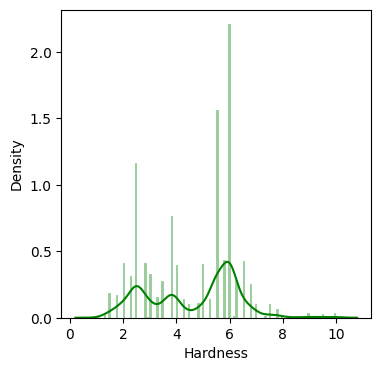

In [52]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
train_df = train_table.copy()
reference = np.array(hardness_values_total)

for val in outlier_hardness_values:
    train_df = train_df[~(train_df[HARDNESS] == val)]

def replace_with_closest(arr, reference):
    indices = np.array([np.abs(reference - a).argmin() for a in arr])
    return reference[indices]

fig, ax = distribution_plot(train_df['Hardness'], color='g', ax=None, fig=None)
lines = ax.lines[0].get_xdata()

new_lines = np.repeat(ax.lines[0].get_xdata(), 1+(train_df.shape[0]//len(lines)))[:train_df.shape[0]]
train_df.sort_values(by=HARDNESS, inplace=True)
train_df["Density"] = np.log2(new_lines + 1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

hardness_from_density = dict(zip(train_df["Density"], train_df[HARDNESS]))

scores = []
for fold, (idx_tr, idx_va) in enumerate(kf.split(train_df)):
    print(f"Fold: {fold}")
    X_tr = train_df.iloc[idx_tr].copy() 
    X_va = train_df.iloc[idx_va].copy()
    X_tr.pop('Hardness')
    y_tr = X_tr.pop('Density')
    X_va.pop("Density")
    y_va = X_va.pop('Hardness')

    # Fit and score a model without sample weights
    # model = RandomForestRegressor(criterion="absolute_error", random_state=1, max_depth=20, n_jobs=8)
    model = GradientBoostingRegressor(subsample=0.5, max_depth=10)
    print("Training")
    model.fit(X_tr, y_tr)
    print("Predicting")
    predictions = model.predict(X_va)
    print("Getting densities")
    corr_density = replace_with_closest(predictions, np.unique(train_df["Density"]))
    
    print("Getting hardness")
    hardness = [hardness_from_density[dens] for dens in corr_density]
    medae = median_absolute_error(y_va, hardness)
    print(f"score for {fold} iteration: {medae}")
    scores.append(medae)
    
print(f"Total score: {np.mean(scores)}")